In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import shapiro
from statsmodels.stats.multitest import multipletests

In [2]:
# Load the data
name = 'CloudResearch-1_24.08.12'
df = pd.read_csv('/work/Processed Data/' + name + '_processed.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

In [4]:
# Dictionary to rename variables to more readable names
rename_dict = {'Frequency_Score_centered': 'Chatbot Usage Frequency',
 'Session_Length_Score_centered': 'Chatbot Session Length',
 'ULS_8_centered': 'Loneliness (ULS-8)',
 'SUS_Avg_centered': 'System Usability (SUS)',
 'BFI_Extraversion_centered': 'Extraversion (BFI-10)',
 'BFI_Neurotic_centered': 'Neuroticism (BFI-10)',
 'BFI_Agreeableness_centered': 'Agreeableness (BFI-10)',
 'BFI_Conscientious_centered': 'Conscientiousness (BFI-10)',
 'BFI_Openness_centered': 'Openness (BFI-10)',
 'LSNS_Score_centered': 'Socialization (LSNS)',
 'MSPSS_Score_centered': 'Perceived Social Support (MSPSS)',
 'B_RSES_Score_centered': 'Self-Esteem (B-RSES)',
 'AI_Attitudes_Score_centered': 'Attitudes towards AI',
 'C_State_Empathy_centered': 'State Empathy towards Chatbot',
 'C_SEmp_Affective_centered': 'Affective State Empathy towards Chatbot',
 'C_SEmp_Cognitive_centered': 'Cognitive State Empathy towards Chatbot',
 'C_SEmp_Associative_centered': 'Associative State Empathy towards Chatbot',
 'C_Social_Attract_centered': 'Social Attraction towards Chatbot',
 'C_Phys_Attract_centered': 'Physical Attraction towards Chatbot',
 'C_Task_Attract_centered': 'Task Attraction towards Chatbot',
 'C_Homophily_centered': 'Perceived Similarity with Chatbot',
 'C_Attrib_Conf_centered': 'Perceived Chatbot Predictability',
 'HCI_HHI_Expectation_centered': 'Expectations towards Chatbot (HCI/HHI)',
 'HCI_HHI_Trust_centered': 'Trust towards Chatbot (HCI/HHI)',
 'HCI_HHI_Substitution_centered': 'Preference for Chatbot over Humans (HCI/HHI)',
 'HHI_Trust___Unfam_centered': 'Trust in Unfamiliar People (HHI)',
 'HHI_CommIntent___Unfam_centered': 'Willingness to Engage with Unfamiliar People (HHI)',
 'HHI_Trust___Familiar_centered': 'Trust in Familiar People (HHI)',
 'HHI_CommIntent___Familiar_centered': 'Willingness to Engage with Familiar People (HHI)',
 'H_State_Empathy_centered': 'State Empathy towards Close Person',
 'H_SEmp_Affective_centered': 'Affective State Empathy towards Close Person',
 'H_SEmp_Cognitive_centered': 'Cognitive State Empathy towards Close Person',
 'H_SEmp_Associative_centered': 'Associative State Empathy towards Close Person',
 'H_Social_Attract_centered': 'Social Attraction towards towards Close Person',
 'H_Task_Attract_centered': 'Task Attraction towards towards Close Person',
 'H_Homophily_centered': 'Perceived Similarity with Close Person',
 'Age_centered': 'Age',
 'GPIUS2_centered': 'Problematic Use of Chatbot (GPIUS-2)',
 'Relation_Effect_1_centered': 'Chatbot Effect: Less Interaction with People',
 'Relation_Effect_2_centered': 'Chatbot Effect: Shift in Conversation Topics with People',
 'Relation_Effect_3_centered': 'Chatbot Effect: Easier to Talk to People',
 'Relation_Effect_4_centered': 'Chatbot Effect: More Enjoyable to Talk to People',
 'Relation_Effect_5_centered': 'Chatbot Effect: Less Engaging to Talk to People',
 'Relation_Effect_6_centered': 'Chatbot Effect: Less Interest in Talking to People'}

In [5]:
rename_dict.values()

dict_values(['Chatbot Usage Frequency', 'Chatbot Session Length', 'Loneliness (ULS-8)', 'System Usability (SUS)', 'Extraversion (BFI-10)', 'Neuroticism (BFI-10)', 'Agreeableness (BFI-10)', 'Conscientiousness (BFI-10)', 'Openness (BFI-10)', 'Socialization (LSNS)', 'Perceived Social Support (MSPSS)', 'Self-Esteem (B-RSES)', 'Attitudes towards AI', 'State Empathy towards Chatbot', 'Affective State Empathy towards Chatbot', 'Cognitive State Empathy towards Chatbot', 'Associative State Empathy towards Chatbot', 'Social Attraction towards Chatbot', 'Physical Attraction towards Chatbot', 'Task Attraction towards Chatbot', 'Perceived Similarity with Chatbot', 'Perceived Chatbot Predictability', 'Expectations towards Chatbot (HCI/HHI)', 'Trust towards Chatbot (HCI/HHI)', 'Preference for Chatbot over Humans (HCI/HHI)', 'Trust in Unfamiliar People (HHI)', 'Willingness to Engage with Unfamiliar People (HHI)', 'Trust in Familiar People (HHI)', 'Willingness to Engage with Familiar People (HHI)', 'St

In [6]:
# Dictionary to rename variables to more readable names
rename_dict_2 = {'Frequency_Score': 'Chatbot Usage Frequency',
 'Session_Length_Score': 'Chatbot Session Length',
 'ULS_8': 'Loneliness (ULS-8)',
 'SUS_Avg': 'System Usability (SUS)',
 'BFI_Extraversion': 'Extraversion (BFI-10)',
 'BFI_Neurotic': 'Neuroticism (BFI-10)',
 'BFI_Agreeableness': 'Agreeableness (BFI-10)',
 'BFI_Conscientious': 'Conscientiousness (BFI-10)',
 'BFI_Openness': 'Openness (BFI-10)',
 'LSNS_Score': 'Socialization (LSNS)',
 'MSPSS_Score': 'Perceived Social Support (MSPSS)',
 'B_RSES_Score': 'Self-Esteem (B-RSES)',
 'AI_Attitudes_Score': 'Attitudes towards AI',
 'C_State_Empathy': 'State Empathy towards Chatbot',
 'C_SEmp_Affective': 'Affective State Empathy towards Chatbot',
 'C_SEmp_Cognitive': 'Cognitive State Empathy towards Chatbot',
 'C_SEmp_Associative': 'Associative State Empathy towards Chatbot',
 'C_Social_Attract': 'Social Attraction towards Chatbot',
 'C_Phys_Attract': 'Physical Attraction towards Chatbot',
 'C_Task_Attract': 'Task Attraction towards Chatbot',
 'C_Homophily': 'Perceived Similarity with Chatbot',
 'C_Attrib_Conf': 'Perceived Chatbot Predictability',
 'HCI_HHI_Expectation': 'Expectations towards Chatbot (HCI/HHI)',
 'HCI_HHI_Trust': 'Trust towards Chatbot (HCI/HHI)',
 'HCI_HHI_Substitution': 'Preference for Chatbot over Humans (HCI/HHI)',
 'HHI_Trust___Unfam': 'Trust in Unfamiliar People (HHI)',
 'HHI_CommIntent___Unfam': 'Willingness to Engage with Unfamiliar People (HHI)',
 'HHI_Trust___Familiar': 'Trust in Familiar People (HHI)',
 'HHI_CommIntent___Familiar': 'Willingness to Engage with Familiar People (HHI)',
 'H_State_Empathy': 'State Empathy towards Close Person',
 'H_SEmp_Affective': 'Affective State Empathy towards Close Person',
 'H_SEmp_Cognitive': 'Cognitive State Empathy towards Close Person',
 'H_SEmp_Associative': 'Associative State Empathy towards Close Person',
 'H_Social_Attract': 'Social Attraction towards towards Close Person',
 'H_Task_Attract': 'Task Attraction towards towards Close Person',
 'H_Homophily': 'Perceived Similarity with Close Person',
 'Age': 'Age',
 'GPIUS2': 'Problematic Use of Chatbot (GPIUS-2)',
 'Relation_Effect_1': 'Chatbot Effect: Less Interaction with People',
 'Relation_Effect_2': 'Chatbot Effect: Shift in Conversation Topics with People',
 'Relation_Effect_3': 'Chatbot Effect: Easier to Talk to People',
 'Relation_Effect_4': 'Chatbot Effect: More Enjoyable to Talk to People',
 'Relation_Effect_5': 'Chatbot Effect: Less Engaging to Talk to People',
 'Relation_Effect_6': 'Chatbot Effect: Less Interest in Talking to People'}

In [7]:
# List of variables
variables = ['Frequency Score', 'Session Length Score', 
                    'ULS-8', 'GPIUS2', 'SUS Avg', 'BFI Extraversion', 'BFI Neurotic', 'BFI Agreeableness', 
                    'BFI Conscientious', 'BFI Openness', 'LSNS Score', 'MSPSS Score', 'B-RSES Score', 
                    'AI Attitudes Score', 'C State Empathy', 'C SEmp Affective', 'C SEmp Cognitive', 
                    'C SEmp Associative', 'C Social Attract', 'C Phys Attract', 'C Task Attract', 
                    'C Homophily', 'C Attrib Conf', 'Relation_Effect_1', 'Relation_Effect_2', 'Relation_Effect_3', 'Relation_Effect_4', 
                    'Relation_Effect_5', 'Relation_Effect_6', 
                    'HCI-HHI Expectation', 'HCI-HHI Trust', 
                    'HCI-HHI Substitution', 'HHI Trust - Unfam', 'HHI CommIntent - Unfam', 
                    'HHI Trust - Familiar', 'HHI CommIntent - Familiar', 'H State Empathy', 
                    'H SEmp Affective', 'H SEmp Cognitive', 'H SEmp Associative', 'H Social Attract', 
                    'H Task Attract', 'H Homophily', 'Age']

# Replace spaces and hyphens in variable names
variables = [var.replace(' ', '_').replace('-', '_') for var in variables]
var_centered = [var + '_centered' for var in variables]

key_variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'GPIUS2_centered']

print(var_centered)

# Standardize the data
scaler = StandardScaler()
df[var_centered] = scaler.fit_transform(df[variables])

['Frequency_Score_centered', 'Session_Length_Score_centered', 'ULS_8_centered', 'GPIUS2_centered', 'SUS_Avg_centered', 'BFI_Extraversion_centered', 'BFI_Neurotic_centered', 'BFI_Agreeableness_centered', 'BFI_Conscientious_centered', 'BFI_Openness_centered', 'LSNS_Score_centered', 'MSPSS_Score_centered', 'B_RSES_Score_centered', 'AI_Attitudes_Score_centered', 'C_State_Empathy_centered', 'C_SEmp_Affective_centered', 'C_SEmp_Cognitive_centered', 'C_SEmp_Associative_centered', 'C_Social_Attract_centered', 'C_Phys_Attract_centered', 'C_Task_Attract_centered', 'C_Homophily_centered', 'C_Attrib_Conf_centered', 'Relation_Effect_1_centered', 'Relation_Effect_2_centered', 'Relation_Effect_3_centered', 'Relation_Effect_4_centered', 'Relation_Effect_5_centered', 'Relation_Effect_6_centered', 'HCI_HHI_Expectation_centered', 'HCI_HHI_Trust_centered', 'HCI_HHI_Substitution_centered', 'HHI_Trust___Unfam_centered', 'HHI_CommIntent___Unfam_centered', 'HHI_Trust___Familiar_centered', 'HHI_CommIntent___Fa

In [8]:
# Check data
df[var_centered].describe()

Frequency_Score_centered  Session_Length_Score_centered  \
count              4.040000e+02                   4.040000e+02   
mean               5.012492e-16                  -4.396923e-17   
std                1.001240e+00                   1.001240e+00   
min               -3.002056e+00                  -1.014723e+00   
25%               -4.129963e-01                  -1.014723e+00   
50%                4.500235e-01                   1.099631e-01   
75%                4.500235e-01                   1.099631e-01   
max                1.313043e+00                   4.608708e+00   

       ULS_8_centered  GPIUS2_centered  SUS_Avg_centered  \
count    4.040000e+02     4.040000e+02      4.040000e+02   
mean    -1.934646e-16    -1.846708e-16      2.638154e-16   
std      1.001240e+00     1.001240e+00      1.001240e+00   
min     -1.792966e+00    -1.394208e+00     -3.426758e+00   
25%     -7.777476e-01    -8.794627e-01     -6.925855e-01   
50%      6.826756e-02    -1.073448e-01     -4.501829e-02   
75%      7.450797e-01     6.647731e-01      8.184047e-01   
max      2.267907e+00     3.238499e+00      2.082703e+00   

       BFI_Extraversion_centered  BFI_Neurotic_centered  \
count               4.040000e+02           4.040000e+02   
mean                1.121215e-16           1.450985e-16   
std                 1.001240e+00           1.001240e+00   
min                -1.679291e+00          -1.692860e+00   
25%                -4.634603e-01          -8.052344e-01   
50%                 1.444552e-01           8.239097e-02   
75%                 7.523707e-01           6.371569e-01   
max                 3.184033e+00           1.857642e+00   

       BFI_Agreeableness_centered  BFI_Conscientious_centered  \
count                4.040000e+02                4.040000e+02   
mean                 4.836615e-17               -2.341361e-16   
std                  1.001240e+00                1.001240e+00   
min                 -1.450706e+00               -3.095353e+00   
25%                 -9.623020e-01               -5.093789e-01   
50%                  1.450706e-02                1.711405e-01   
75%                  5.029116e-01                7.155561e-01   
max                  2.456530e+00                1.259972e+00   

       BFI_Openness_centered  ...  HHI_Trust___Familiar_centered  \
count           4.040000e+02  ...                   4.040000e+02   
mean           -8.793846e-17  ...                  -2.066554e-16   
std             1.001240e+00  ...                   1.001240e+00   
min            -3.092336e+00  ...                  -3.732899e+00   
25%            -8.986506e-01  ...                  -5.096210e-01   
50%             1.981918e-01  ...                   2.961985e-01   
75%             7.466131e-01  ...                   6.991083e-01   
max             1.295034e+00  ...                   1.102018e+00   

       HHI_CommIntent___Familiar_centered  H_State_Empathy_centered  \
count                        4.040000e+02              4.040000e+02   
mean                         9.893076e-17              5.759969e-16   
std                          1.001240e+00              1.001240e+00   
min                         -3.554573e+00             -5.316461e+00   
25%                         -4.579746e-01             -4.931431e-01   
50%                          3.161749e-01              1.767621e-01   
75%                          7.032497e-01              7.126863e-01   
max                          1.090324e+00              1.114629e+00   

       H_SEmp_Affective_centered  H_SEmp_Cognitive_centered  \
count               4.040000e+02               4.040000e+02   
mean                2.418308e-16               4.308984e-16   
std                 1.001240e+00               1.001240e+00   
min                -4.870686e+00              -5.426415e+00   
25%                -3.874725e-01              -6.249440e-01   
50%                -1.387133e-02               1.753012e-01   
75%                 7.333309e-01               9.755464e-01

In [9]:
# Check different correlation methods
correlation_pearson = df[var_centered].corr(method='pearson', min_periods=1)
correlation_spearman = df[var_centered].corr(method='spearman', min_periods=1)
correlation_kendall = df[var_centered].corr(method='kendall', min_periods=1)

# Compare the results
diff_spearman_pearson = correlation_spearman - correlation_pearson
diff_kendall_pearson = correlation_kendall - correlation_pearson

print("Largest differences between Spearman and Pearson:")
print(diff_spearman_pearson.abs().unstack().nlargest(10))

print("\nLargest differences between Kendall and Pearson:")
print(diff_kendall_pearson.abs().unstack().nlargest(10))

Largest differences between Spearman and Pearson:
BFI_Openness_centered               H_Social_Attract_centered             0.071063
H_Social_Attract_centered           BFI_Openness_centered                 0.071063
BFI_Openness_centered               H_SEmp_Associative_centered           0.070161
H_SEmp_Associative_centered         BFI_Openness_centered                 0.070161
BFI_Openness_centered               H_SEmp_Affective_centered             0.069850
H_SEmp_Affective_centered           BFI_Openness_centered                 0.069850
Relation_Effect_1_centered          H_SEmp_Cognitive_centered             0.067828
H_SEmp_Cognitive_centered           Relation_Effect_1_centered            0.067828
Session_Length_Score_centered       HHI_CommIntent___Familiar_centered    0.066851
HHI_CommIntent___Familiar_centered  Session_Length_Score_centered         0.066851
dtype: float64

Largest differences between Kendall and Pearson:
ULS_8_centered               MSPSS_Score_centered      

In [10]:
correlation_matrix = df[var_centered].corr(method='spearman', min_periods=1)

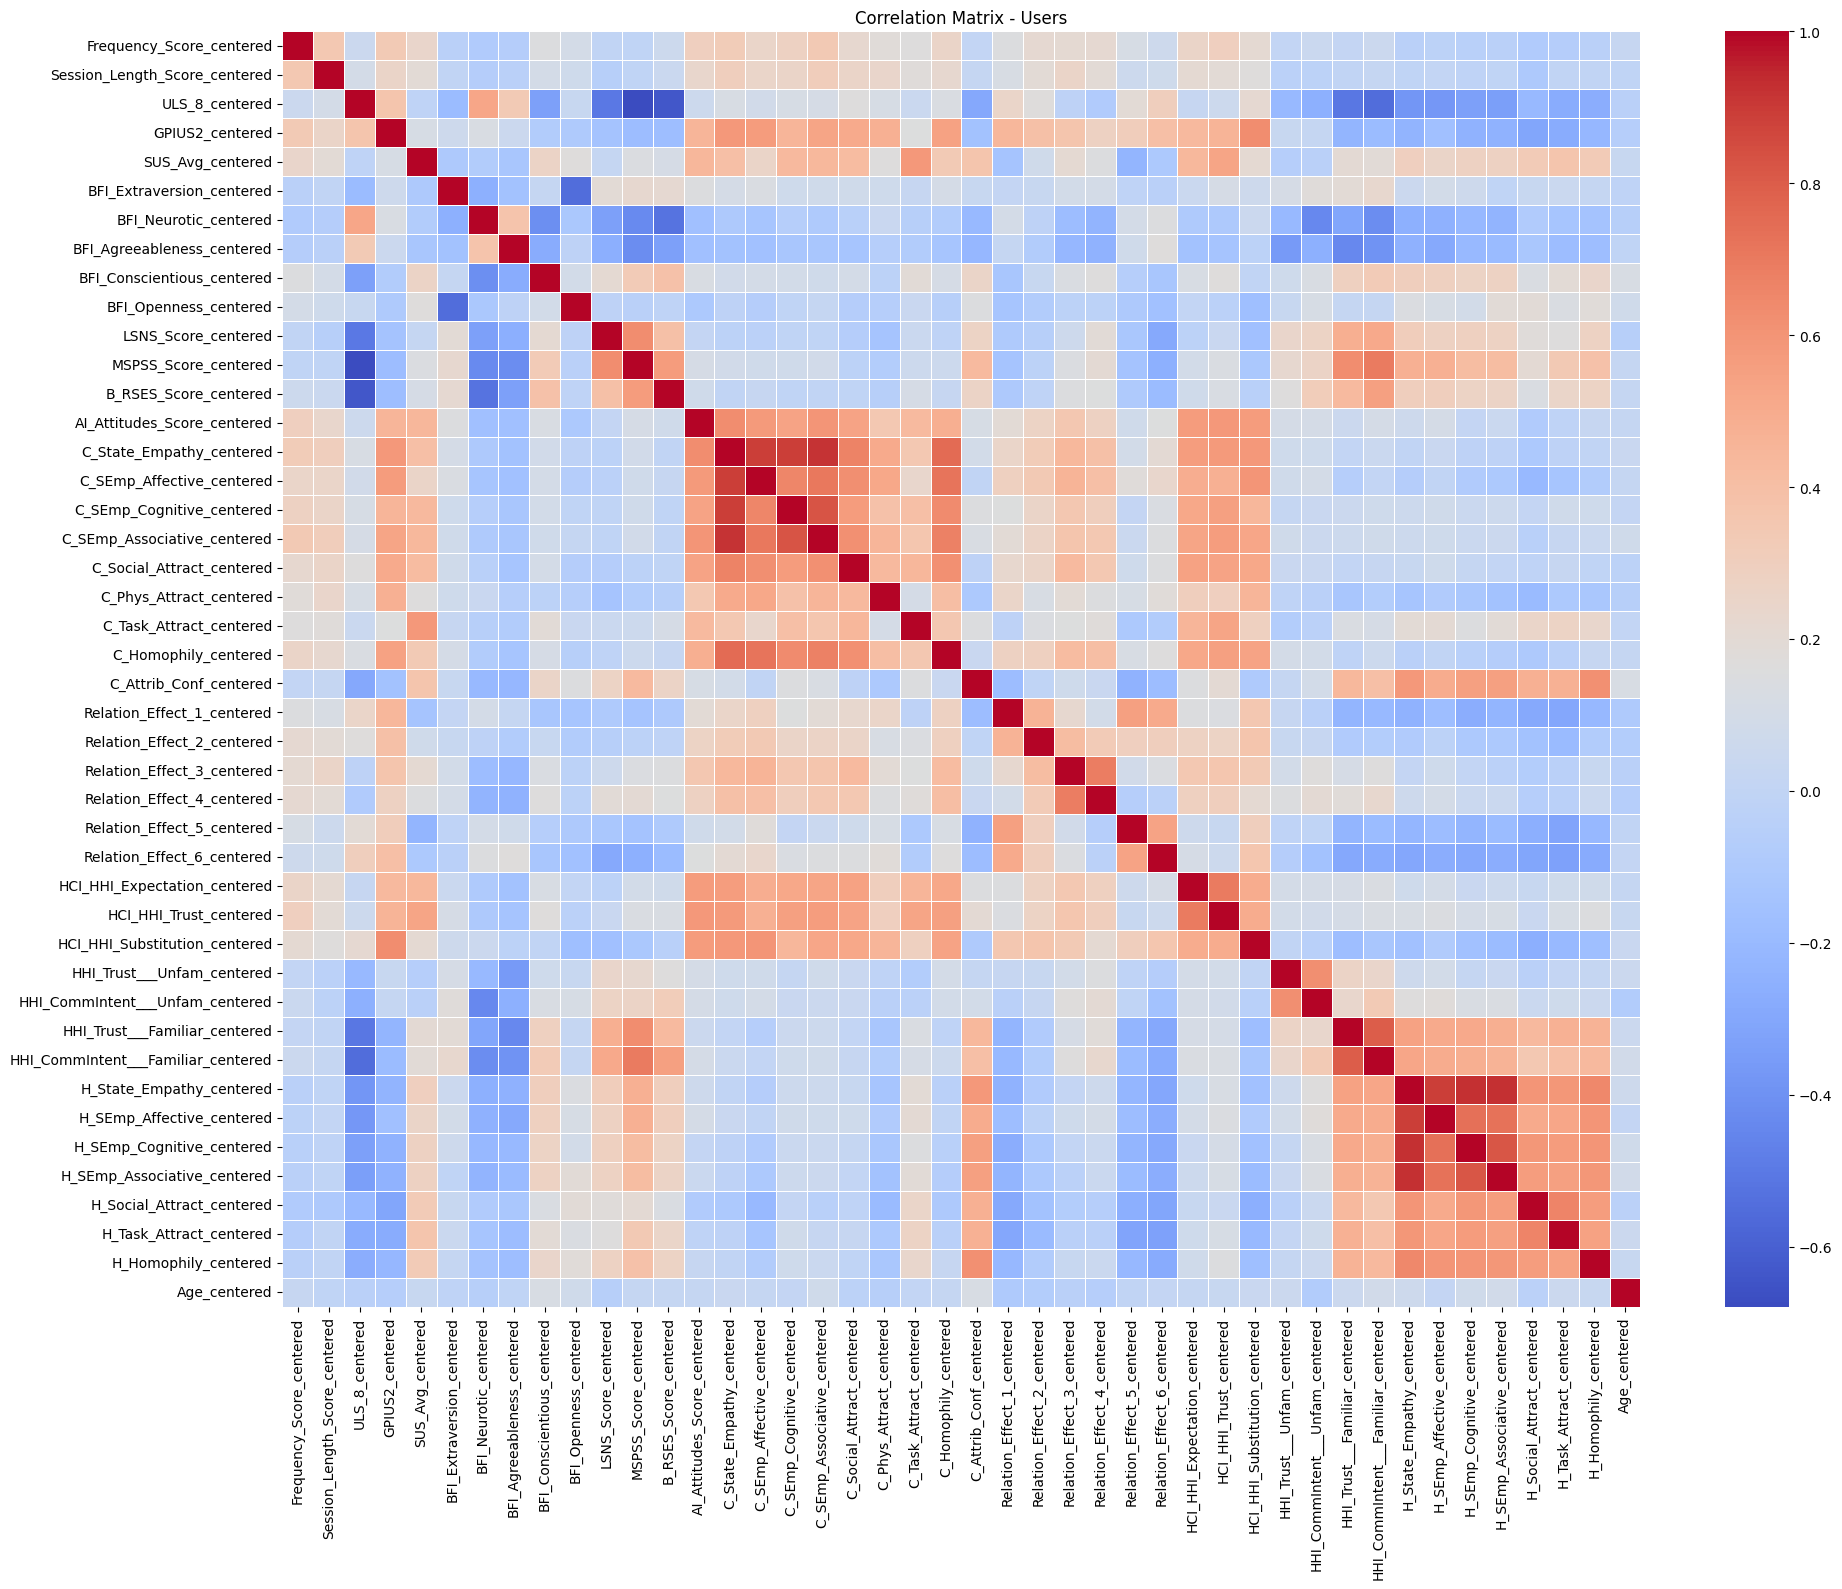

In [11]:
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Users')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Function to calculate p-value
def calculate_pvalue(r, n):
    if abs(r) == 1.0:
        return 0.0  # Perfect correlation, p-value is 0
    else:
        t = r * np.sqrt((n-2) / (1-r**2))
        p = 2 * (1 - stats.t.cdf(np.abs(t), n-2))
        return p

# Calculate p-values
n = df[var_centered].shape[0]  # sample size
p_values_matrix = correlation_matrix.applymap(lambda x: calculate_pvalue(x, n))

In [13]:
# Function to find significant correlations
def find_significant_correlations(correlation_matrix, p_values_matrix, key_variables, var_names, alpha=0.05):
    #significant_correlations = []
    for key_var in key_variables:
        print(f"\nSignificant correlations with {key_var}:")
        for var in var_names:
            if var != key_var:
                corr = correlation_matrix.loc[key_var, var]
                p_val = p_values_matrix.loc[key_var, var]
                if p_val < alpha:
                    # significant_correlations.append((key_var, var, corr, p_val))
                    print(f"{var}: correlation = {corr:.4f}, p-value = {p_val:.4f}")
    return #significant_correlation

# Function to visualize significant correlations
def significant_correlation_matrix(correlation_matrix, p_values_matrix, variables_of_interest, p_threshold=0.05, rename_dict=None, title=''):
    # Create a boolean mask for significant correlations
    significant_mask = (p_values_matrix < p_threshold) | (p_values_matrix.T < p_threshold)
    
    # Ensure variables of interest are always included
    for var in variables_of_interest:
        significant_mask[var] = True
        significant_mask.loc[var] = True
    
    # Apply the mask to get the significant correlation matrix
    significant_corr_matrix = correlation_matrix.loc[significant_mask.any(axis=1), significant_mask.any(axis=0)]

    # Create a copy for visualization
    viz_matrix = significant_corr_matrix.copy()

    # Rename the index and columns if a rename dictionary is provided
    if rename_dict:
        viz_matrix = viz_matrix.rename(index=rename_dict, columns=rename_dict)
        # Also rename the index and columns of the significant_mask
        significant_mask = significant_mask.rename(index=rename_dict, columns=rename_dict)
    
    # Create a mask for the heatmap to hide insignificant correlations
    heatmap_mask = ~significant_mask.loc[viz_matrix.index, viz_matrix.columns]
    
    # Set diagonal to False (to always show self-correlations)
    np.fill_diagonal(heatmap_mask.values, False)
    
    # Plot the heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(viz_matrix, 
                mask=heatmap_mask,
                annot=False, 
                cmap='coolwarm', 
                vmin=-1, 
                vmax=1, 
                center=0,
                square=True,
                linewidths=0.5)
    plt.title(title + ' ' f'Correlation Matrix (p < {p_threshold})')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
    plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
    plt.tight_layout()
    plt.savefig("/work/Output Figures/sigCorMatrix.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return significant_corr_matrix

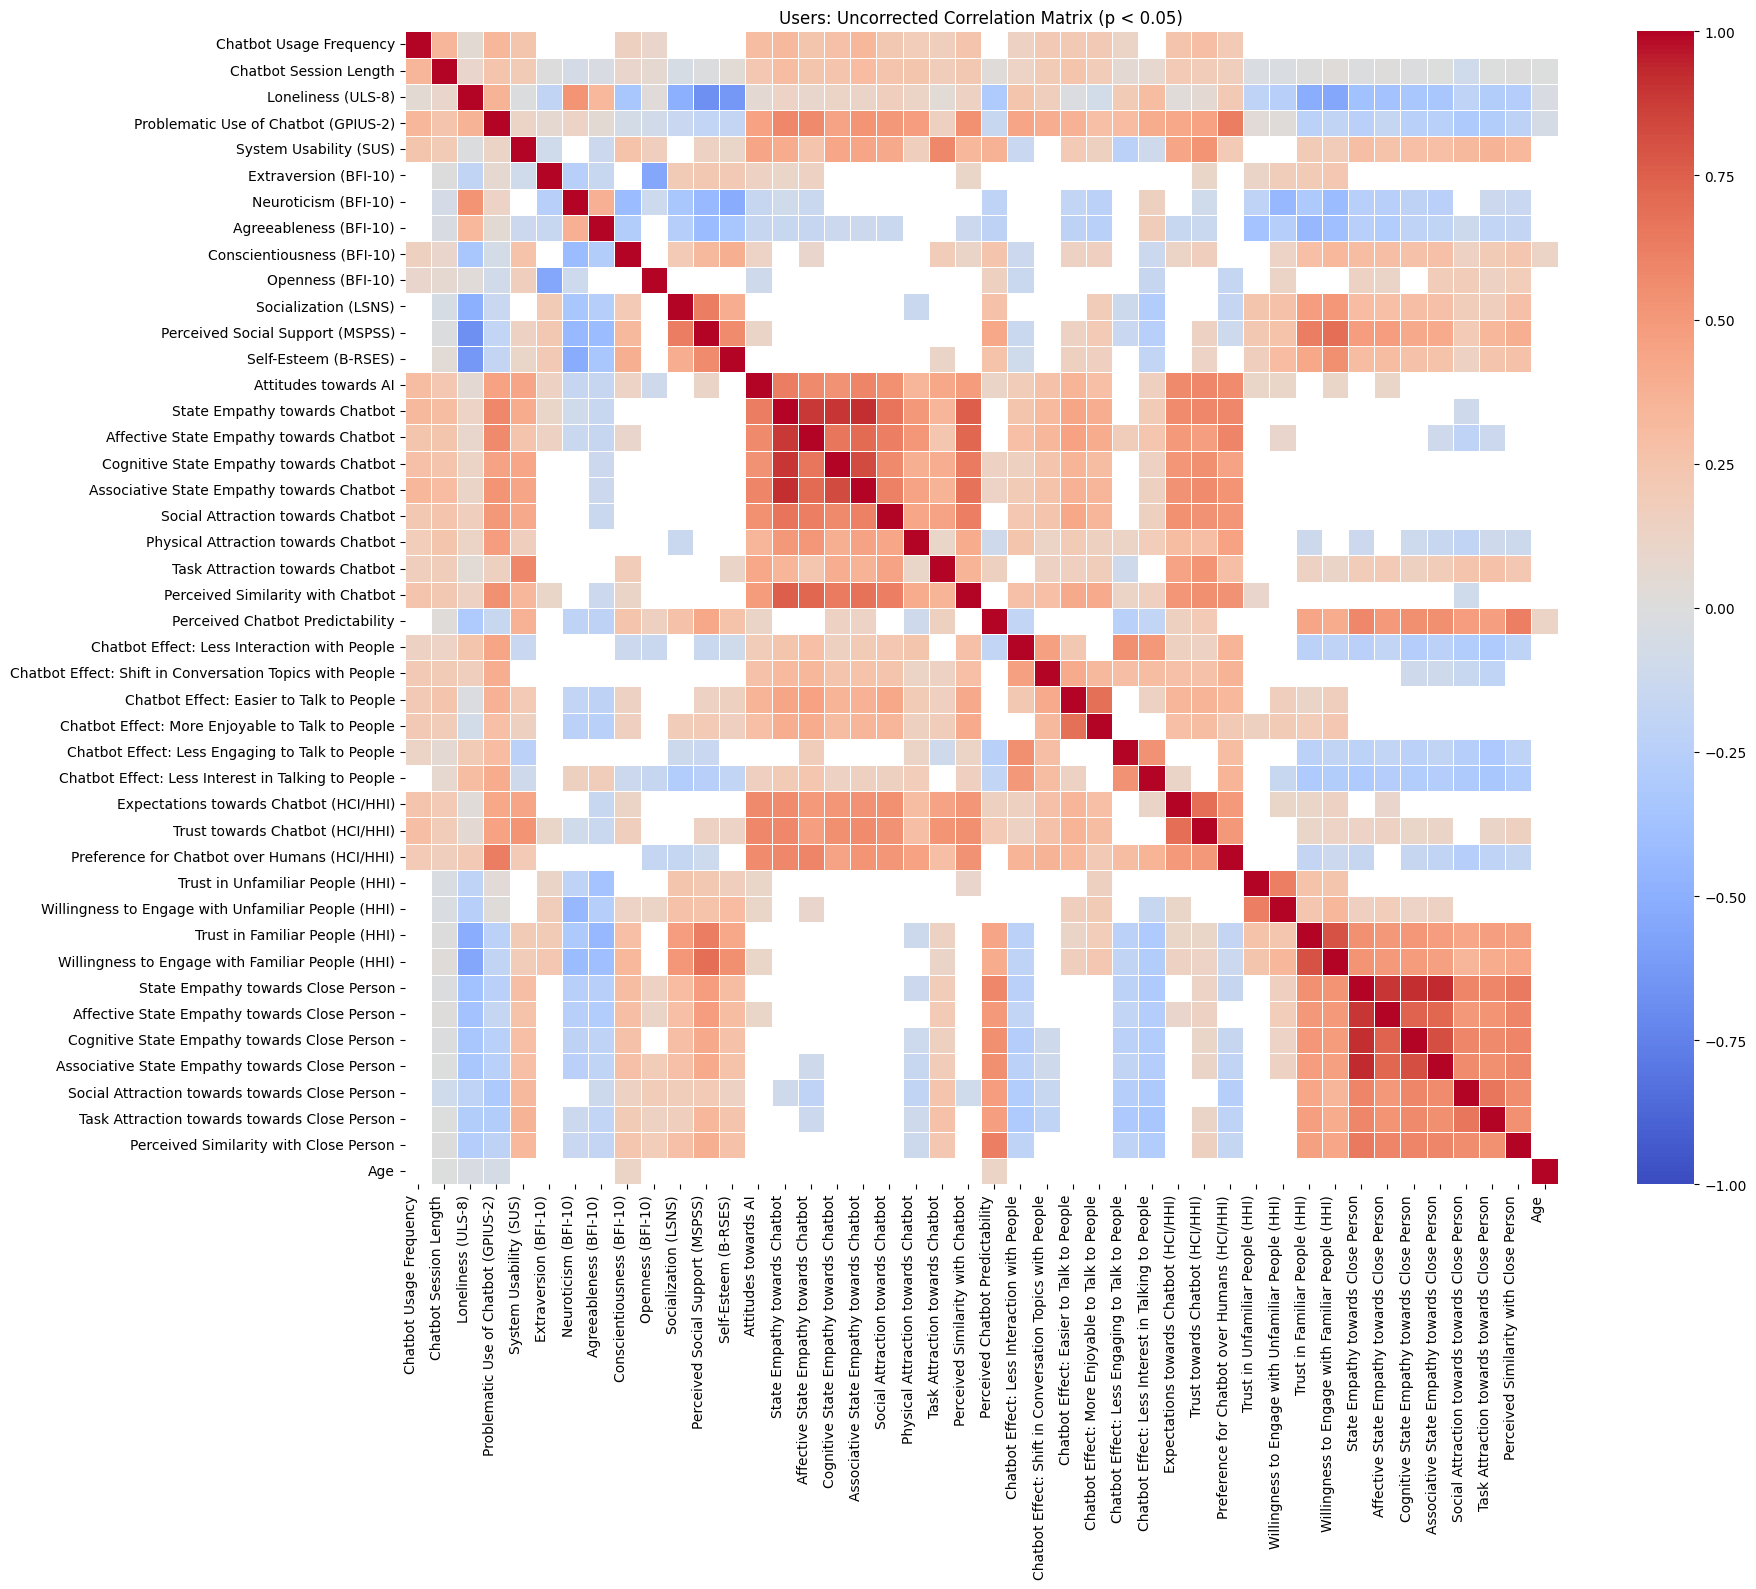

In [14]:
# Uncorrected significant correlations
significant_corr = significant_correlation_matrix(correlation_matrix, p_values_matrix, 
                                                key_variables, rename_dict=rename_dict, title='Users: Uncorrected')

In [15]:
def apply_benjamini_hochberg(correlation_matrix, p_values_matrix, alpha=0.05):
    # Flatten the p-values matrix
    p_values_flat = p_values_matrix.values.flatten()
    
    # Apply Benjamini-Hochberg correction
    rejected, p_values_corrected, _, _ = multipletests(p_values_flat, alpha=alpha, method='fdr_bh')
    
    # Reshape the corrected p-values back into a matrix
    p_values_corrected_matrix = p_values_corrected.reshape(p_values_matrix.shape)
    
    # Create a DataFrame with the corrected p-values
    p_values_corrected_df = pd.DataFrame(p_values_corrected_matrix, 
                                         index=p_values_matrix.index, 
                                         columns=p_values_matrix.columns)
    
    # Create a mask for significant correlations
    significant_mask = p_values_corrected_df < alpha
    
    # Apply the mask to the correlation matrix
    correlation_matrix_significant = correlation_matrix.where(significant_mask)
    
    return correlation_matrix_significant, p_values_corrected_df

# Significant correlations after BH correction
correlation_matrix_significant, p_values_corrected = apply_benjamini_hochberg(correlation_matrix, p_values_matrix)

# Print the number of significant correlations
print(f"Number of significant correlations before BH correction: {significant_corr.notna().sum().sum() // 2}")
print(f"Number of significant correlations after BH correction: {correlation_matrix_significant.notna().sum().sum() // 2}")

Number of significant correlations before BH correction: 968
Number of significant correlations after BH correction: 583


In [16]:
# Print significant correlations
find_significant_correlations(correlation_matrix_significant, p_values_corrected, key_variables, var_centered)


Significant correlations with Session_Length_Score_centered:
Frequency_Score_centered: correlation = 0.3497, p-value = 0.0000
GPIUS2_centered: correlation = 0.2549, p-value = 0.0000
SUS_Avg_centered: correlation = 0.1962, p-value = 0.0002
AI_Attitudes_Score_centered: correlation = 0.2331, p-value = 0.0000
C_State_Empathy_centered: correlation = 0.3016, p-value = 0.0000
C_SEmp_Affective_centered: correlation = 0.2475, p-value = 0.0000
C_SEmp_Cognitive_centered: correlation = 0.2539, p-value = 0.0000
C_SEmp_Associative_centered: correlation = 0.3073, p-value = 0.0000
C_Social_Attract_centered: correlation = 0.2553, p-value = 0.0000
C_Phys_Attract_centered: correlation = 0.2438, p-value = 0.0000
C_Task_Attract_centered: correlation = 0.1787, p-value = 0.0007
C_Homophily_centered: correlation = 0.2213, p-value = 0.0000
Relation_Effect_1_centered: correlation = 0.1267, p-value = 0.0193
Relation_Effect_2_centered: correlation = 0.1955, p-value = 0.0002
Relation_Effect_3_centered: correlatio

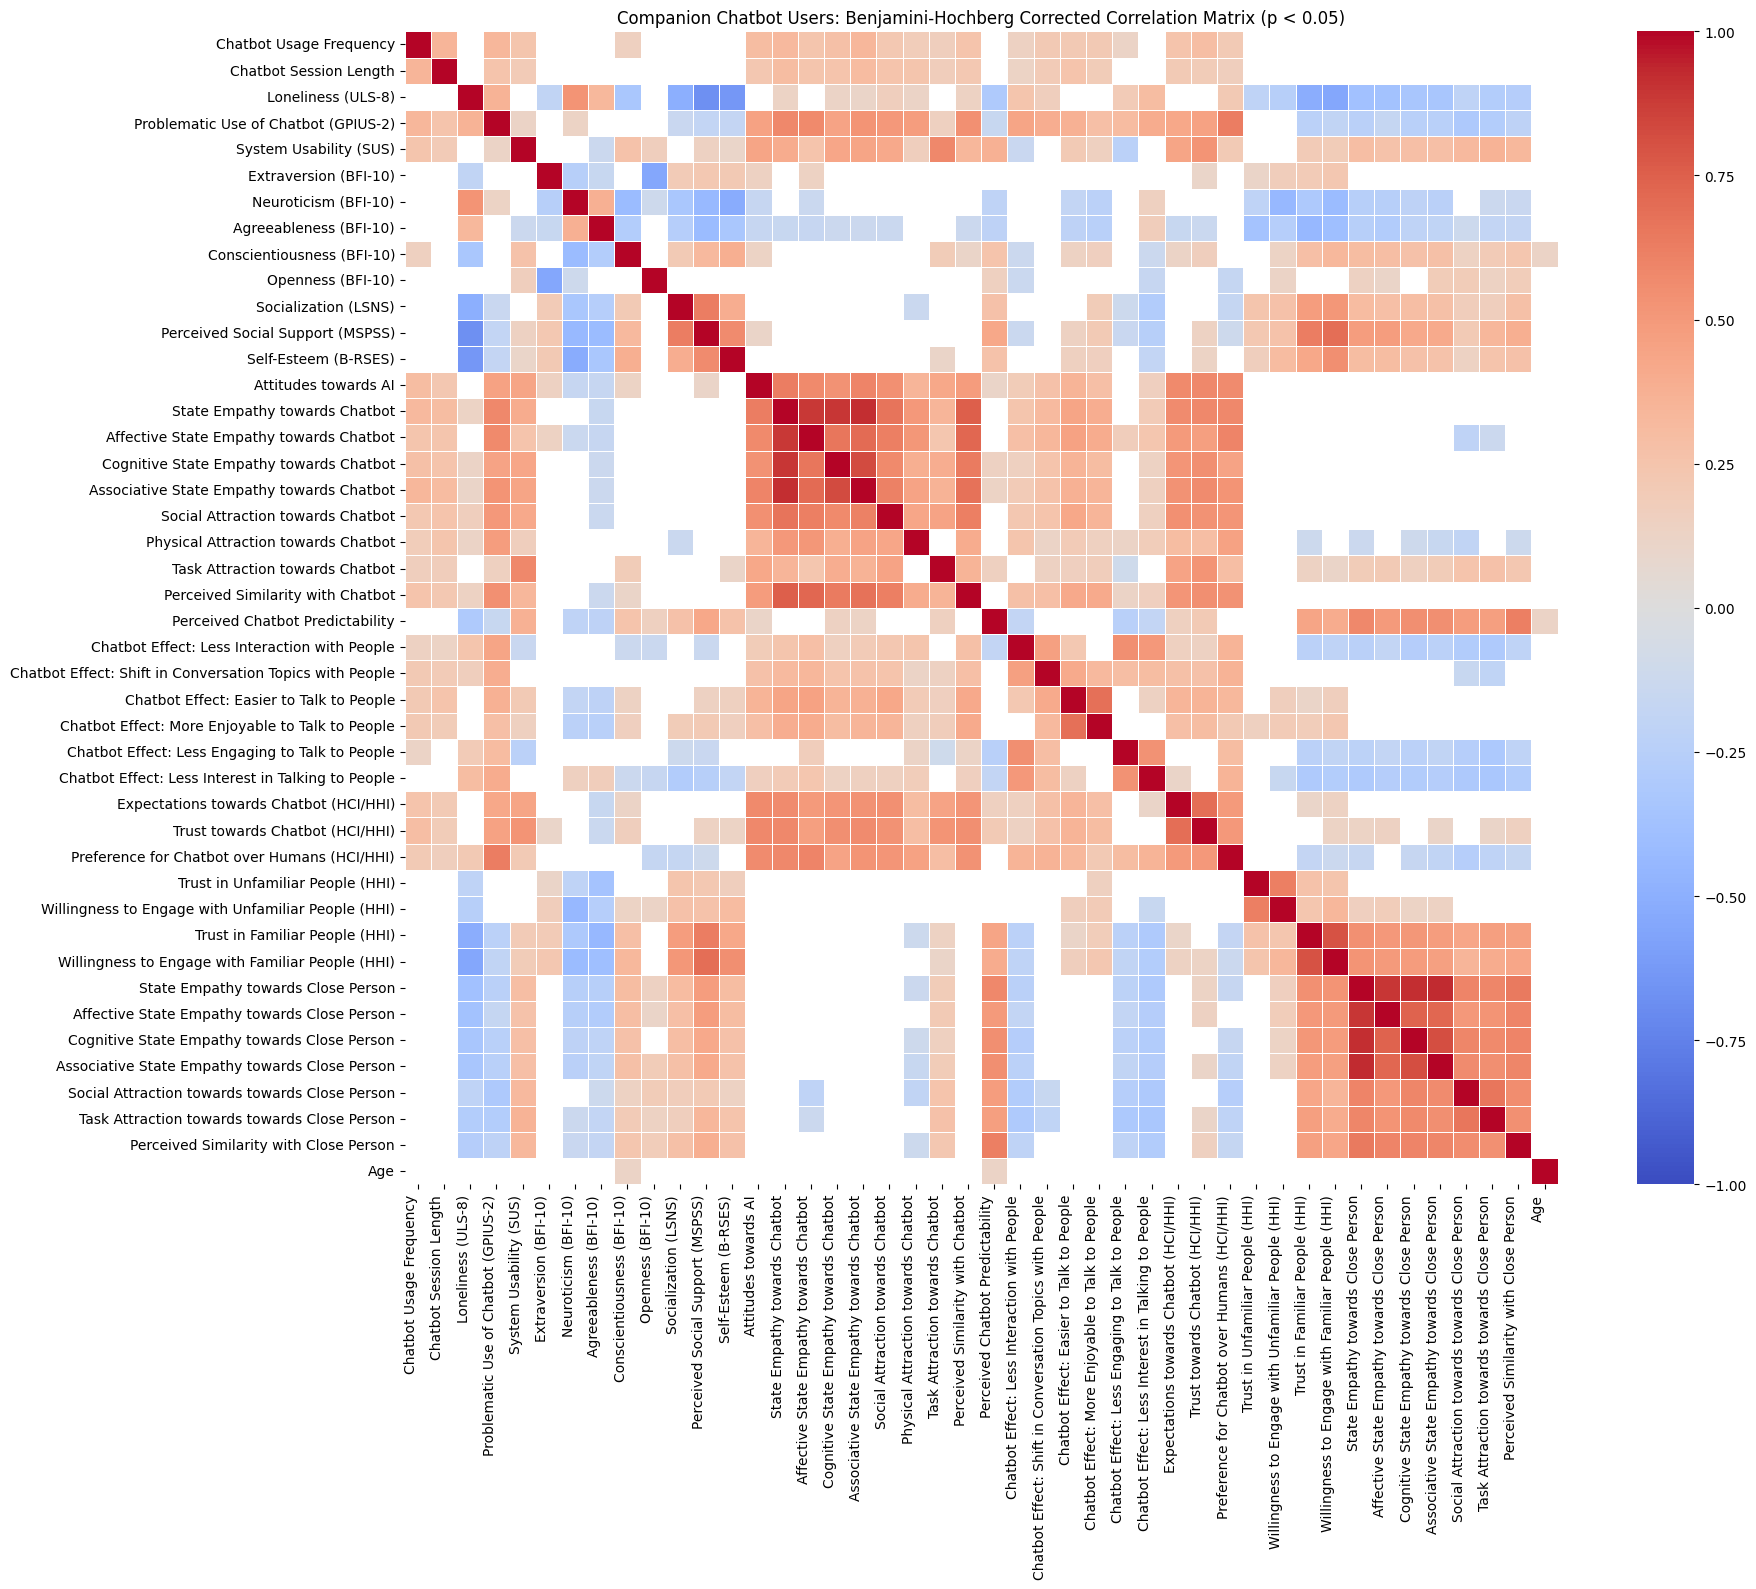

In [17]:
significant_corr = significant_correlation_matrix(correlation_matrix_significant, p_values_corrected, key_variables, rename_dict=rename_dict, title='Companion Chatbot Users: Benjamini-Hochberg Corrected')

In [18]:
correlation_matrix_significant.rename(index=rename_dict, columns=rename_dict).to_csv("/work/Output Data/correlation_matrix_significant.csv", index=True, header=True)
p_values_corrected.rename(index=rename_dict, columns=rename_dict).to_csv("/work/Output Data/corr_p_values_corrected.csv", index=True, header=True)

# Clustering

In [19]:
def select_features(correlation_matrix, p_values_matrix, target_variables, p_threshold=0.05, corr_threshold=0.3):
    significant_features = set()
    for target in target_variables:
        significant_mask = (p_values_matrix[target] < p_threshold) & (abs(correlation_matrix[target]) >= corr_threshold)
        significant_features.update(correlation_matrix.index[significant_mask])
    
    significant_features = list(significant_features - set(target_variables))
    return significant_features

def perform_cluster_analysis(data, correlation_matrix, p_values_matrix, target_variables, user_specific_features=None, n_clusters_range=range(3, 18), max_features=10, chosen_k=None):
    # Select features based on significant correlations
    common_features = select_features(correlation_matrix, p_values_matrix, target_variables)
    
    # Add user-specific features if provided
    if user_specific_features:
        features = list(set(common_features + user_specific_features))  # Remove duplicates
    else:
        features = common_features
    
    print(f"Selected features: {features}")
    
    # Prepare the data, dropping any rows with NaN in the selected features
    X = data[features + target_variables].dropna()
    
    # If there are too many features, use PCA to reduce dimensionality
    if len(features) > max_features:
        print(f"Selected {len(features)} features. Reducing to {max_features} principal components.")
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X[features])
        pca = PCA(n_components=max_features)
        X_pca = pca.fit_transform(X_scaled)
        feature_names = [f'PC{i+1}' for i in range(max_features)]
        X_for_clustering = pd.DataFrame(X_pca, columns=feature_names, index=X.index)
    else:
        print(f"Using {len(features)} selected features for clustering.")
        X_for_clustering = X[features]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_for_clustering)

    # Perform elbow method
    wcss = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    # Calculate silhouette scores
    silhouette_scores = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k')
    plt.show()

    if chosen_k:
        optimal_clusters = chosen_k
    else:
        # Ask user for the optimal number of clusters
        optimal_clusters = int(input("Based on the elbow plot and silhouette scores, enter the optimal number of clusters: "))

    # Perform K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    X['Cluster'] = kmeans.fit_predict(X_scaled)

    # Visualize the clusters using the first two features or principal components
    plt.figure(figsize=(10, 6))
    x_col, y_col = X_for_clustering.columns[0], X_for_clustering.columns[1]
    plot_data = pd.concat([X_for_clustering, X['Cluster']], axis=1)
    sns.scatterplot(data=plot_data, x=x_col, y=y_col, hue='Cluster', palette='deep')
    plt.title(f'Cluster Analysis: {x_col} vs {y_col}')
    plt.show()

    # Analyze cluster characteristics
    if len(features) > max_features:
        cluster_means = X.groupby('Cluster')[target_variables].mean()
        print("Cluster Means (only for target variables due to PCA):")
    else:
        cluster_means = X.groupby('Cluster')[features + target_variables].mean()
        print("Cluster Means:")
    print(cluster_means)

    return X, cluster_means, features

Selected features: ['Relation_Effect_2_centered', 'HCI_HHI_Expectation_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'C_Homophily_centered', 'HCI_HHI_Trust_centered', 'MSPSS_Score_centered', 'C_Phys_Attract_centered', 'BFI_Neurotic_centered', 'C_SEmp_Associative_centered', 'H_SEmp_Associative_centered', 'C_SEmp_Cognitive_centered', 'C_Attrib_Conf_centered', 'AI_Attitudes_Score_centered', 'B_RSES_Score_centered', 'Frequency_Score_centered', 'LSNS_Score_centered', 'Relation_Effect_4_centered', 'C_Social_Attract_centered', 'HHI_CommIntent___Familiar_centered', 'BFI_Conscientious_centered', 'C_Task_Attract_centered', 'HCI_HHI_Substitution_centered', 'Relation_Effect_6_centered', 'H_SEmp_Cognitive_centered', 'H_State_Empathy_centered', 'Relation_Effect_5_centered', 'C_SEmp_Affective_centered', 'BFI_Agreeableness_centered', 'C_State_Empathy_centered', 'H_SEmp_Affective_centered', 'Relation_Effect_1_centered', 'HHI_Trust___Familiar_centered']
Selected 33 features. Redu

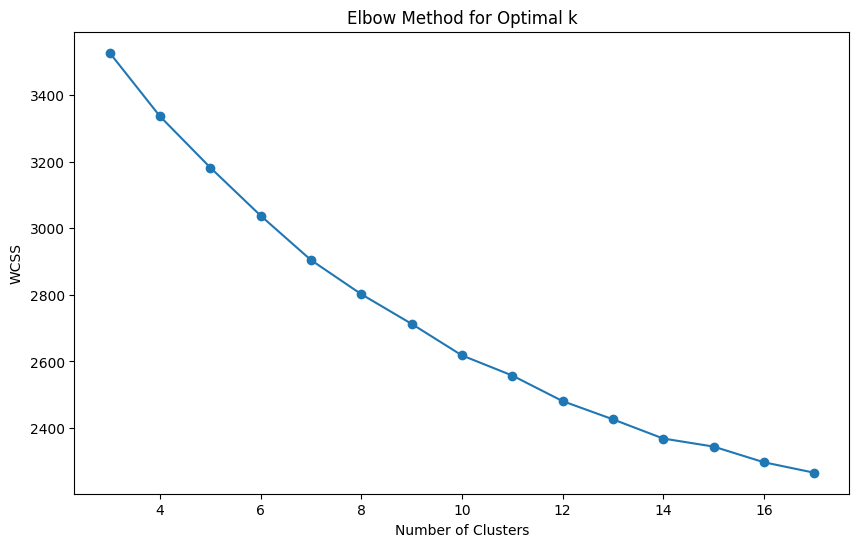

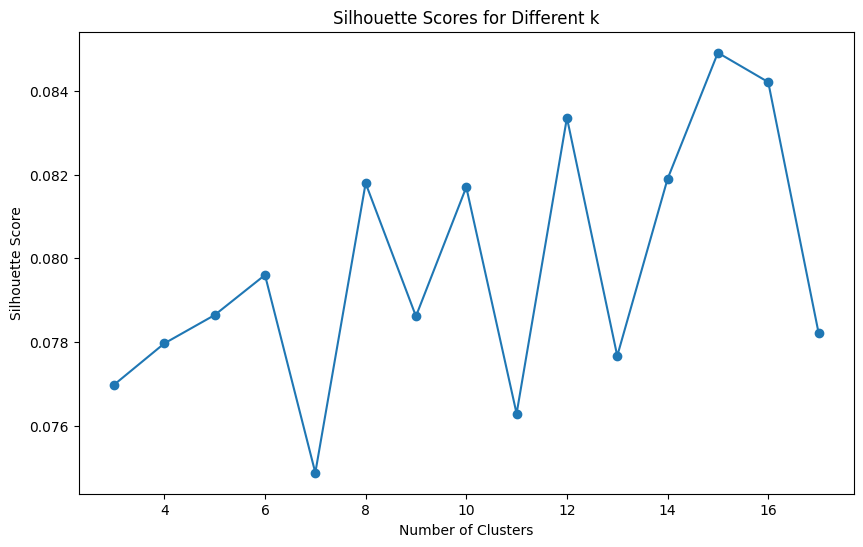

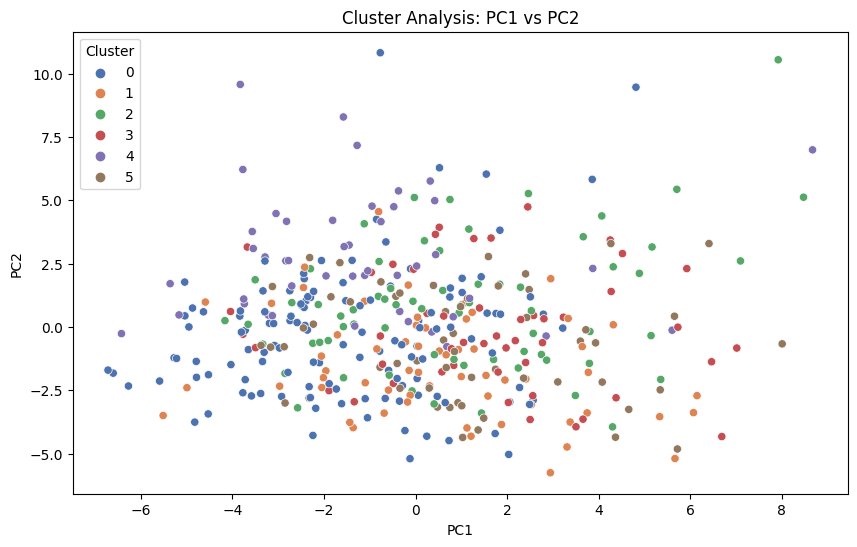

Cluster Means (only for target variables due to PCA):
         Session_Length_Score_centered  ULS_8_centered  GPIUS2_centered
Cluster                                                                
0                             0.204437       -0.348649         0.167529
1                            -0.058740       -0.360380        -0.467666
2                            -0.038892        0.598271        -0.041109
3                            -0.532715       -0.031873        -0.398859
4                             0.281111        0.664157         1.109580
5                            -0.110957       -0.079785        -0.385399


In [20]:
user_specific_features = ['Frequency Score', 'C State Empathy', 'C SEmp Affective', 'C SEmp Cognitive', 
                            'C SEmp Associative', 'C Social Attract', 'C Phys Attract', 'C Task Attract', 
                            'C Homophily', 'C Attrib Conf', 'HCI-HHI Expectation', 'HCI-HHI Trust', 
                            'HCI-HHI Substitution',
                            'Relation_Effect_1', 'Relation_Effect_2', 'Relation_Effect_3', 'Relation_Effect_4', 
                            'Relation_Effect_5', 'Relation_Effect_6']

# Replace spaces and hyphens in variable names
user_specific_features = [var.replace(' ', '_').replace('-', '_') for var in user_specific_features]
user_specific_features = [var + '_centered' for var in user_specific_features]

clustered_data, cluster_characteristics, selected_features = perform_cluster_analysis(
    df, correlation_matrix, p_values_matrix, key_variables, user_specific_features, chosen_k=6
)

In [21]:
#cluster_dict = {0: '0: Lonely Light Users', 1: '1: Cautious Moderate Users', 
#        2: '2: Dependent Moderate Users', 3: '3: Balanced Moderate Users', 
#        4: '4: Engaged Heavy Users', 5: '5: Well-Adjusted Light Users'}

In [22]:
cluster_dict = {0: '0: Lonely Light Users', 1: '1: Cautious Moderate Users', 
        2: '2: Dependent Moderate Users', 3: '3: Balanced Moderate Users', 
        4: '4: Engaged Heavy Users', 5: '5: Well-Adjusted Light Users'}

In [23]:
cluster_characteristics_viz = cluster_characteristics.copy().rename(columns=rename_dict, index=cluster_dict)
cluster_characteristics_viz

Chatbot Session Length  Loneliness (ULS-8)  \
Cluster                                                                    
0: Lonely Light Users                       0.204437           -0.348649   
1: Cautious Moderate Users                 -0.058740           -0.360380   
2: Dependent Moderate Users                -0.038892            0.598271   
3: Balanced Moderate Users                 -0.532715           -0.031873   
4: Engaged Heavy Users                      0.281111            0.664157   
5: Well-Adjusted Light Users               -0.110957           -0.079785   

                              Problematic Use of Chatbot (GPIUS-2)  
Cluster                                                             
0: Lonely Light Users                                     0.167529  
1: Cautious Moderate Users                               -0.467666  
2: Dependent Moderate Users                              -0.041109  
3: Balanced Moderate Users                               -0.398859  
4: Engaged Heavy Users                                    1.109580  
5: Well-Adjusted Light Users                             -0.385399

In [24]:
def create_heatmap(cluster_data, features, target_variables):
    # Calculate mean values for all features and target variables
    cluster_means = cluster_data.groupby('Cluster')[features + target_variables].mean()

    plt.figure(figsize=(10, 6))
    
    sns.heatmap(cluster_means, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Cluster Characteristics Heatmap - Standardized Values')
    plt.ylabel('Cluster')
    plt.xlabel('Variables')
    plt.tight_layout()
    plt.savefig("/work/Output Figures/ClusterHeatmap.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return cluster_means

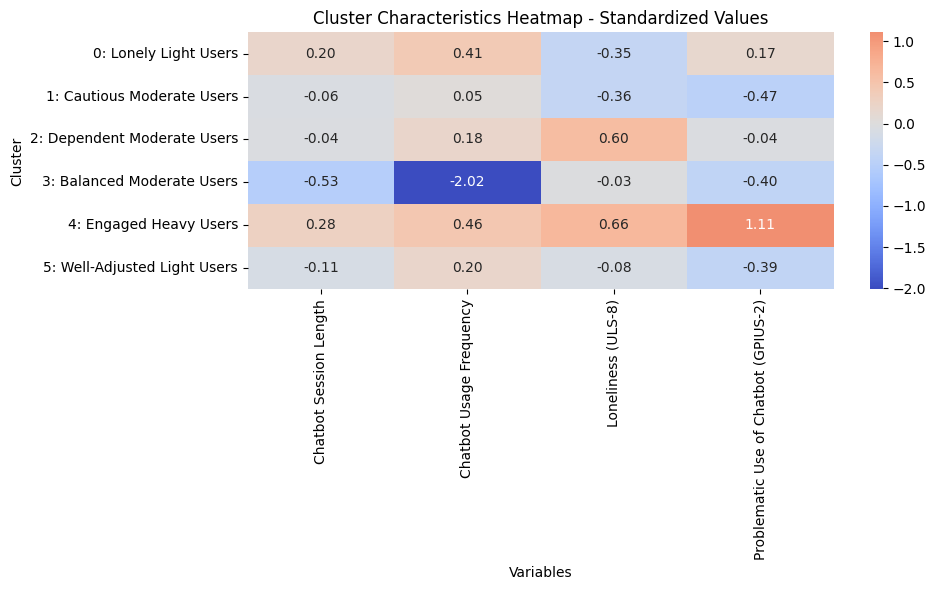

In [25]:
clustered_data_viz = clustered_data.copy().rename(columns=rename_dict)
clustered_data_viz['Cluster'] = clustered_data_viz['Cluster'].replace(cluster_dict)
key_variables_viz =  ['Chatbot Session Length', 'Chatbot Usage Frequency', 'Loneliness (ULS-8)', 'Problematic Use of Chatbot (GPIUS-2)']
selected_features_viz = []

cluster_means_viz = create_heatmap(clustered_data_viz, selected_features_viz, key_variables_viz)

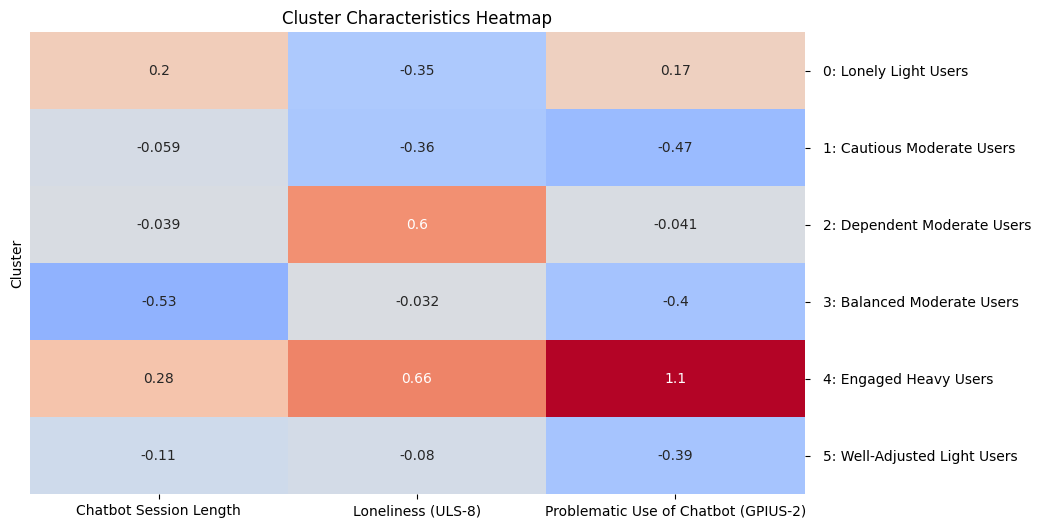

Selected features for clustering: ['Relation_Effect_2_centered', 'HCI_HHI_Expectation_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'C_Homophily_centered', 'HCI_HHI_Trust_centered', 'MSPSS_Score_centered', 'C_Phys_Attract_centered', 'BFI_Neurotic_centered', 'C_SEmp_Associative_centered', 'H_SEmp_Associative_centered', 'C_SEmp_Cognitive_centered', 'C_Attrib_Conf_centered', 'AI_Attitudes_Score_centered', 'B_RSES_Score_centered', 'Frequency_Score_centered', 'LSNS_Score_centered', 'Relation_Effect_4_centered', 'C_Social_Attract_centered', 'HHI_CommIntent___Familiar_centered', 'BFI_Conscientious_centered', 'C_Task_Attract_centered', 'HCI_HHI_Substitution_centered', 'Relation_Effect_6_centered', 'H_SEmp_Cognitive_centered', 'H_State_Empathy_centered', 'Relation_Effect_5_centered', 'C_SEmp_Affective_centered', 'BFI_Agreeableness_centered', 'C_State_Empathy_centered', 'H_SEmp_Affective_centered', 'Relation_Effect_1_centered', 'HHI_Trust___Familiar_centered']


In [26]:
# Visualize cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_characteristics_viz, annot=True, cmap='coolwarm', center=0, yticklabels=[], cbar=False)
plt.title('Cluster Characteristics Heatmap')

# Add y-axis labels on the right side
plt.yticks(np.arange(len(cluster_characteristics_viz.index)) + 0.5, cluster_characteristics_viz.index, rotation=0)
plt.tick_params(axis='y', which='major', pad=10, right=True, left=False, labelleft=False, labelright=True)

plt.savefig("/work/Output Figures/ClusterHeatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Selected features for clustering:", selected_features)

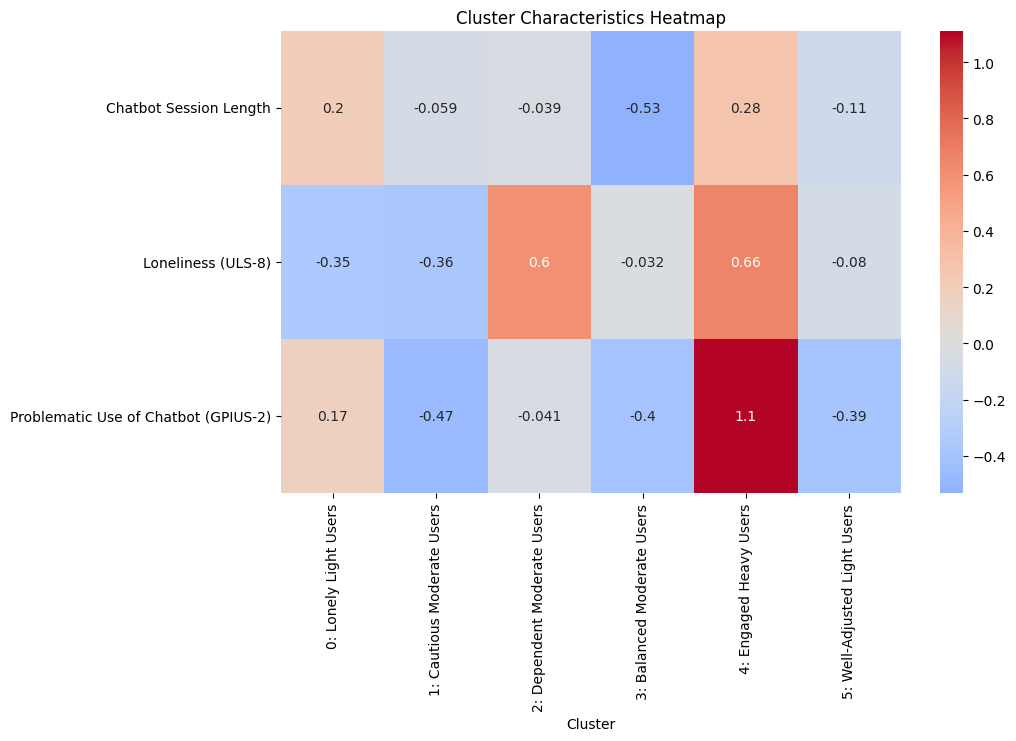

Selected features for clustering: ['Relation_Effect_2_centered', 'HCI_HHI_Expectation_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'C_Homophily_centered', 'HCI_HHI_Trust_centered', 'MSPSS_Score_centered', 'C_Phys_Attract_centered', 'BFI_Neurotic_centered', 'C_SEmp_Associative_centered', 'H_SEmp_Associative_centered', 'C_SEmp_Cognitive_centered', 'C_Attrib_Conf_centered', 'AI_Attitudes_Score_centered', 'B_RSES_Score_centered', 'Frequency_Score_centered', 'LSNS_Score_centered', 'Relation_Effect_4_centered', 'C_Social_Attract_centered', 'HHI_CommIntent___Familiar_centered', 'BFI_Conscientious_centered', 'C_Task_Attract_centered', 'HCI_HHI_Substitution_centered', 'Relation_Effect_6_centered', 'H_SEmp_Cognitive_centered', 'H_State_Empathy_centered', 'Relation_Effect_5_centered', 'C_SEmp_Affective_centered', 'BFI_Agreeableness_centered', 'C_State_Empathy_centered', 'H_SEmp_Affective_centered', 'Relation_Effect_1_centered', 'HHI_Trust___Familiar_centered']


In [27]:
# Visualize cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_characteristics_viz.transpose(), annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Characteristics Heatmap')
plt.savefig("/work/Output Figures/ClusterHeatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Selected features for clustering:", selected_features)

In [28]:
def create_detailed_heatmap(cluster_data, features, target_variables, transpose=False):
    # Calculate mean values for all features and target variables
    cluster_means = cluster_data.groupby('Cluster')[features + target_variables].mean()
    cluster_means_viz = cluster_means.copy()
    if transpose:
        cluster_means_viz = cluster_means_viz.transpose()
        plt.figure(figsize=(len(cluster_means.columns) * 0.3, 16))
    else:
        plt.figure(figsize=(20, len(cluster_means.columns) * 0.2))
    # Create a heatmap
    
    sns.heatmap(cluster_means_viz, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Detailed Cluster Characteristics Heatmap - Standardized Values')
    plt.ylabel('Variables' if transpose else 'Cluster')
    plt.xlabel('Cluster' if transpose else 'Variables')
    plt.tight_layout()
    plt.savefig("/work/Output Figures/DetailedClusterHeatmap.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return cluster_means

def create_detailed_heatmap_std(cluster_data, features, target_variables, transpose=False):
    # Combine features and target variables
    all_variables = features + target_variables
    
    # Calculate mean values for all variables
    cluster_means = cluster_data.groupby('Cluster')[all_variables].mean()
    
    # Standardize the data
    scaler = StandardScaler()
    all_data_std = scaler.fit_transform(cluster_data[all_variables])

    # Calculate standardized means for each cluster
    cluster_means_std = pd.DataFrame(
        index=cluster_means.index,
        columns=cluster_means.columns,
        data=scaler.transform(cluster_means)
    )
    
    # Prepare the data for visualization
    cluster_means_viz = cluster_means.copy()
    if transpose:
        cluster_means_viz = cluster_means_viz.transpose()
        cluster_means_std = cluster_means_std.transpose()
        plt.figure(figsize=(len(cluster_means.columns) * 0.3, len(all_variables) * 0.4))
    else:
        plt.figure(figsize=(len(all_variables) * 0.4, len(cluster_means.columns) * 0.5))
    
    # Create a heatmap
    sns.heatmap(cluster_means_std, annot=cluster_means_viz, fmt='.2f', 
                cmap='coolwarm', center=0, cbar_kws={'label': 'Standard Deviations'})
    
    plt.title('Detailed Cluster Characteristics Heatmap - Original Scale Values')
    plt.ylabel('Variables' if transpose else 'Cluster')
    plt.xlabel('Cluster' if transpose else 'Variables')
    plt.tight_layout()
    plt.savefig("/work/Output Figures/DetailedClusterHeatmap_std.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return cluster_means

def calculate_z_scores(cluster_means):
    return (cluster_means - cluster_means.mean()) / cluster_means.std()

def identify_similar_clusters(z_scores, threshold=1.0):
    # Calculate pairwise distances between clusters
    distances = pdist(z_scores)
    linkage_matrix = linkage(distances, method='ward')
    
    # Create dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Cluster Similarity Dendrogram')
    plt.xlabel('Cluster')
    plt.ylabel('Distance')
    plt.show()
    
    # Find similar clusters based on threshold
    similar_clusters = []
    for i in range(len(z_scores)):
        for j in range(i+1, len(z_scores)):
            distance = np.linalg.norm(z_scores.iloc[i] - z_scores.iloc[j])
            if distance < threshold:
                similar_clusters.append((z_scores.index[i], z_scores.index[j], distance))
    
    return similar_clusters

In [29]:
clustered_data_viz = pd.concat([df, clustered_data], axis=1)
clustered_data_viz = clustered_data_viz.loc[:, ~clustered_data_viz.columns.duplicated()]

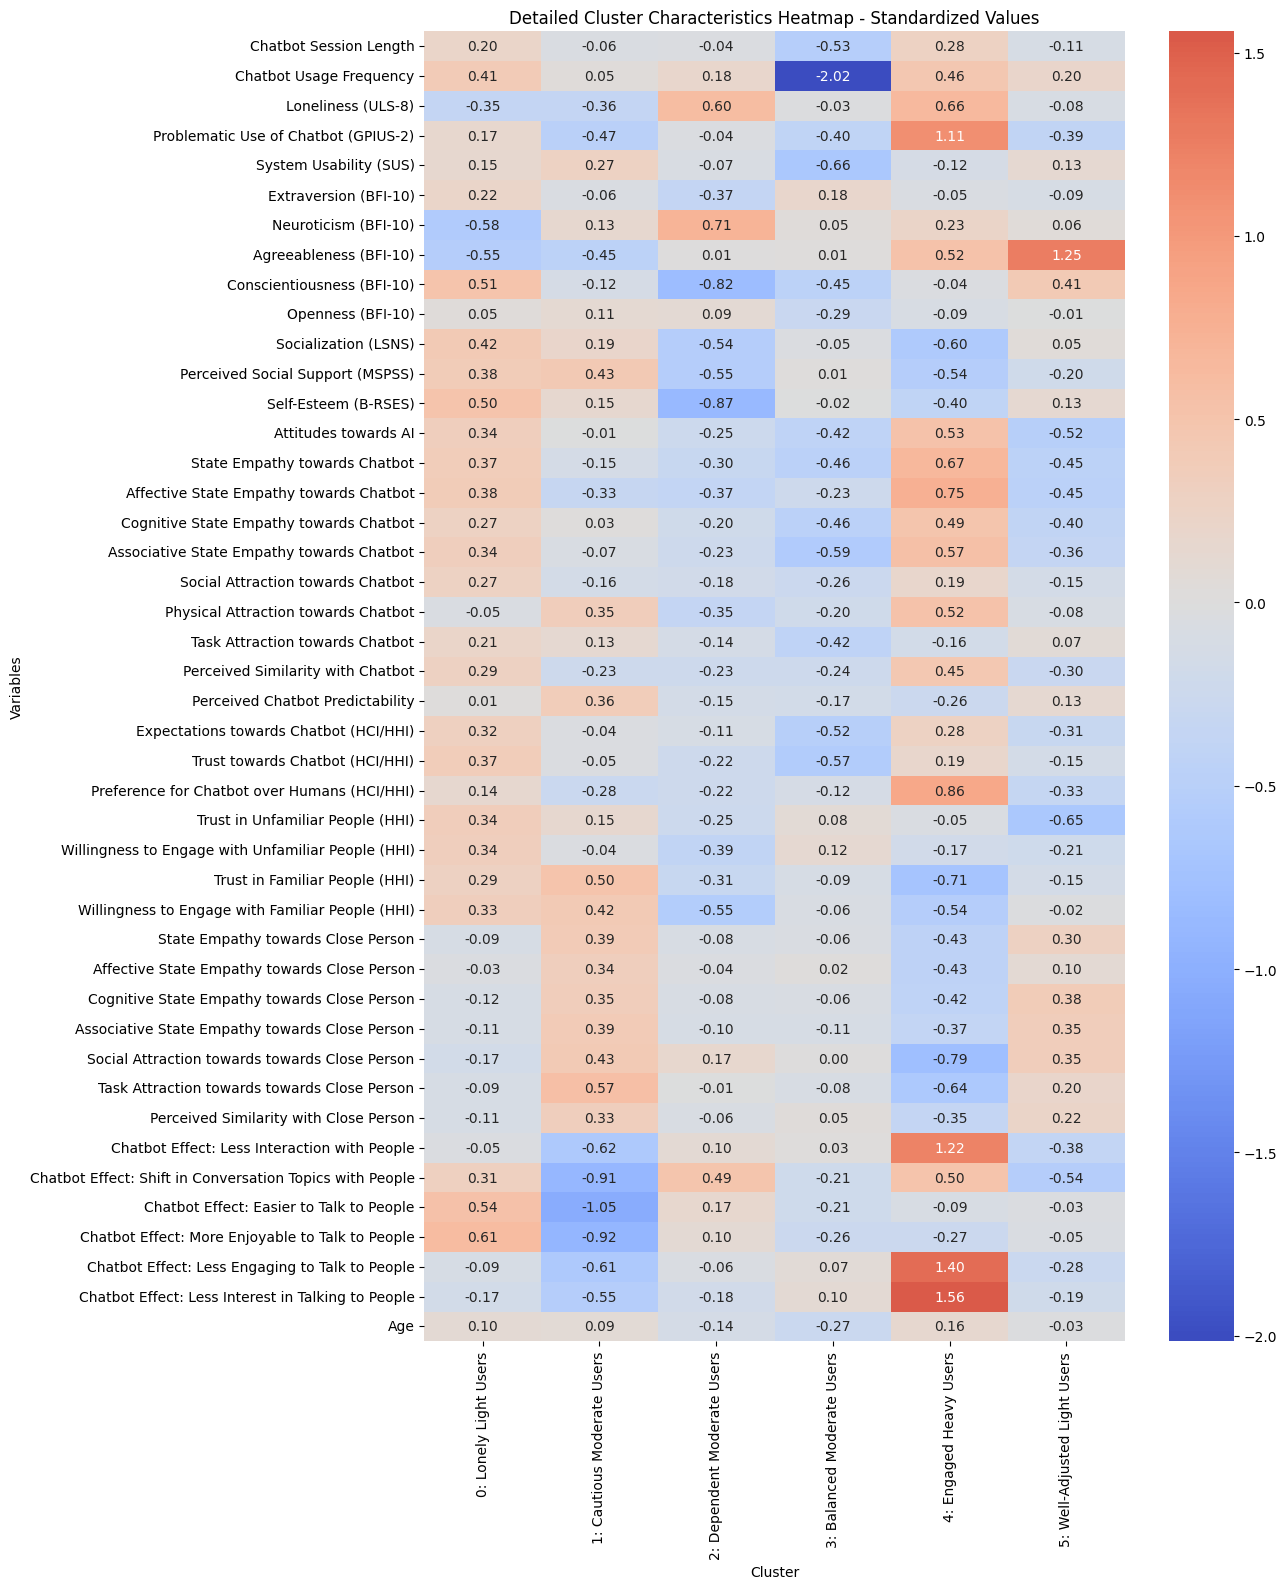

In [30]:
clustered_data_viz_std = clustered_data_viz.copy().drop(columns=['Age']).rename(columns=rename_dict)
clustered_data_viz_std['Cluster'] = clustered_data_viz_std['Cluster'].replace(cluster_dict)
key_variables_viz =  ['Chatbot Session Length', 'Chatbot Usage Frequency', 'Loneliness (ULS-8)', 'Problematic Use of Chatbot (GPIUS-2)', 'System Usability (SUS)', 'Extraversion (BFI-10)', 'Neuroticism (BFI-10)', 'Agreeableness (BFI-10)', 'Conscientiousness (BFI-10)', 'Openness (BFI-10)', 'Socialization (LSNS)', 'Perceived Social Support (MSPSS)', 'Self-Esteem (B-RSES)', 'Attitudes towards AI', 'State Empathy towards Chatbot', 'Affective State Empathy towards Chatbot', 'Cognitive State Empathy towards Chatbot', 'Associative State Empathy towards Chatbot', 'Social Attraction towards Chatbot', 'Physical Attraction towards Chatbot', 'Task Attraction towards Chatbot', 'Perceived Similarity with Chatbot', 'Perceived Chatbot Predictability', 'Expectations towards Chatbot (HCI/HHI)', 'Trust towards Chatbot (HCI/HHI)', 'Preference for Chatbot over Humans (HCI/HHI)', 'Trust in Unfamiliar People (HHI)', 'Willingness to Engage with Unfamiliar People (HHI)', 'Trust in Familiar People (HHI)', 'Willingness to Engage with Familiar People (HHI)', 'State Empathy towards Close Person', 'Affective State Empathy towards Close Person', 'Cognitive State Empathy towards Close Person', 'Associative State Empathy towards Close Person', 'Social Attraction towards towards Close Person', 'Task Attraction towards towards Close Person', 'Perceived Similarity with Close Person', 'Chatbot Effect: Less Interaction with People', 'Chatbot Effect: Shift in Conversation Topics with People', 'Chatbot Effect: Easier to Talk to People', 'Chatbot Effect: More Enjoyable to Talk to People', 'Chatbot Effect: Less Engaging to Talk to People', 'Chatbot Effect: Less Interest in Talking to People', 'Age']
selected_features_viz = []

cluster_means_viz = create_detailed_heatmap(clustered_data_viz_std, selected_features_viz, key_variables_viz, transpose=True)

In [31]:
clustered_data_viz

Unnamed:_0  index            StartDate              EndDate    Status_x  \
0             0      2  2024-06-10 16:25:22  2024-06-10 16:36:39  IP Address   
1             1      3  2024-06-10 16:22:15  2024-06-10 16:37:20  IP Address   
2             2      4  2024-06-10 16:26:47  2024-06-10 16:39:38  IP Address   
3             3      5  2024-06-10 16:22:16  2024-06-10 16:39:57  IP Address   
4             4      6  2024-06-10 16:25:01  2024-06-10 16:40:11  IP Address   
..          ...    ...                  ...                  ...         ...   
399         399    671  2024-08-05 17:07:39  2024-08-05 17:39:17  IP Address   
400         400    673  2024-08-06 08:47:03  2024-08-06 08:55:45  IP Address   
401         401    676  2024-08-06 21:41:46  2024-08-06 21:55:01  IP Address   
402         402    693  2024-08-08 17:30:42  2024-08-08 17:46:22  IP Address   
403         403    698  2024-08-09 05:43:55  2024-08-09 06:00:07  IP Address   

     Progress  Duration_(in_seconds)  Finished         RecordedDate  \
0         100                    677      True  2024-06-10 16:36:40   
1         100                    905      True  2024-06-10 16:37:21   
2         100                    770      True  2024-06-10 16:39:38   
3         100                   1060      True  2024-06-10 16:39:57   
4         100                    909      True  2024-06-10 16:40:11   
..        ...                    ...       ...                  ...   
399       100                   1898      True  2024-08-05 17:39:18   
400       100                    521      True  2024-08-06 08:55:46   
401       100                    794      True  2024-08-06 21:55:02   
402       100                    939      True  2024-08-08 17:46:23   
403       100                    972      True  2024-08-09 06:00:08   

            ResponseId  ... HHI_CommIntent___Familiar_centered  \
0    R_3Tq3KIlfVrBymDk  ...                           1.090324   
1    R_77JLXrlZNFvFjZA  ...                          -1.232124   
2    R_1xOvnrl7kD6ysKd  ...                           1.090324   
3    R_6i2xfeJezDf9zMB  ...                          -2.393348   
4    R_2oYYZFDVjHmNVrC  ...                          -0.070900   
..                 ...  ...                                ...   
399  R_5EA6LxEv0KYmvLe  ...                           0.703250   
400  R_1Dp5aKQHCAxZrmG  ...                           0.703250   
401  R_6IFqIBMPCNE0ZtT  ...                          -2.006274   
402  R_40JjHfQYavKjN2N  ...                           1.090324   
403  R_1UHBs8uY4WYlH0d  ...                           1.090324   

    H_State_Empathy_centered  H_SEmp_Affective_centered  \
0                   0.444724                  -0.387472   
1                  -3.172764                  -3.002680   
2                   0.712686                   0.733331   
3                  -1.163048                  -1.508276   
4                   0.310743                  -0.013871   
..                       ...                        ...   
399                 0.578705                   0.359730   
400                 0.846667                   0.359730   
401                -1.564991                  -1.881877   
402                 1.114629                   1.106932   
403                 0.444724                  -0.013871   

    H_SEmp_Cognitive_centered H_SEmp_Associative_centered  \
0                    0.575424                    1.021357   
1                   -2.625557                   -3.178423   
2                    0.575424                    0.671376   
3                   -1.025067                   -0.728551   
4                    0.575424                    0.321394   
..                        ...                         ...   
399                  0.575424                    0.671376   
400                  0.975546                    1.021357   
401                 -1.025067                   -1.428514   
402                  0.975546                    1.021357   
403               

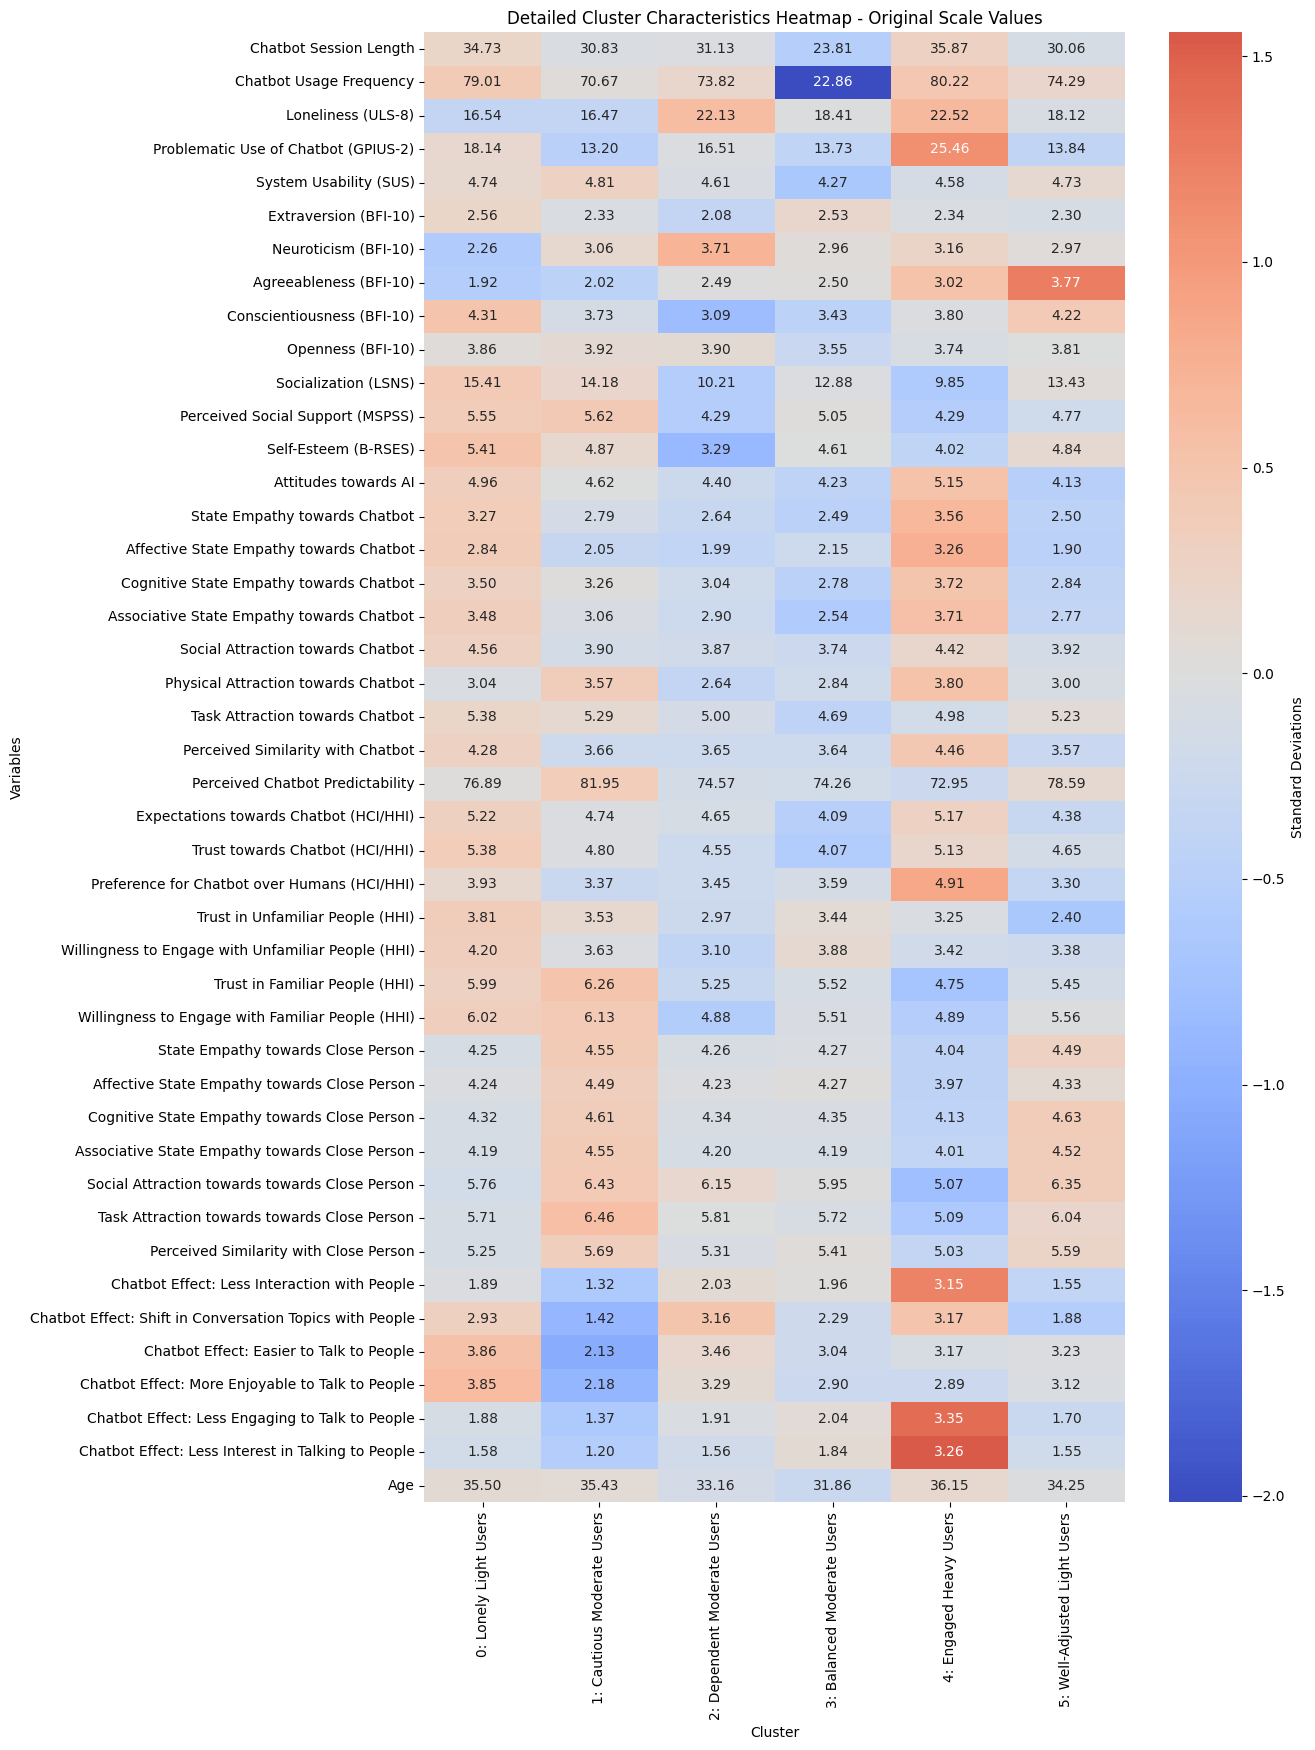

In [32]:
clustered_data_viz_og = clustered_data_viz.rename(columns=rename_dict_2)
clustered_data_viz_og['Cluster'] = clustered_data_viz_og['Cluster'].replace(cluster_dict)
key_variables_viz =  ['Chatbot Session Length', 'Chatbot Usage Frequency', 'Loneliness (ULS-8)', 'Problematic Use of Chatbot (GPIUS-2)', 'System Usability (SUS)', 'Extraversion (BFI-10)', 'Neuroticism (BFI-10)', 'Agreeableness (BFI-10)', 'Conscientiousness (BFI-10)', 'Openness (BFI-10)', 'Socialization (LSNS)', 'Perceived Social Support (MSPSS)', 'Self-Esteem (B-RSES)', 'Attitudes towards AI', 'State Empathy towards Chatbot', 'Affective State Empathy towards Chatbot', 'Cognitive State Empathy towards Chatbot', 'Associative State Empathy towards Chatbot', 'Social Attraction towards Chatbot', 'Physical Attraction towards Chatbot', 'Task Attraction towards Chatbot', 'Perceived Similarity with Chatbot', 'Perceived Chatbot Predictability', 'Expectations towards Chatbot (HCI/HHI)', 'Trust towards Chatbot (HCI/HHI)', 'Preference for Chatbot over Humans (HCI/HHI)', 'Trust in Unfamiliar People (HHI)', 'Willingness to Engage with Unfamiliar People (HHI)', 'Trust in Familiar People (HHI)', 'Willingness to Engage with Familiar People (HHI)', 'State Empathy towards Close Person', 'Affective State Empathy towards Close Person', 'Cognitive State Empathy towards Close Person', 'Associative State Empathy towards Close Person', 'Social Attraction towards towards Close Person', 'Task Attraction towards towards Close Person', 'Perceived Similarity with Close Person', 'Chatbot Effect: Less Interaction with People', 'Chatbot Effect: Shift in Conversation Topics with People', 'Chatbot Effect: Easier to Talk to People', 'Chatbot Effect: More Enjoyable to Talk to People', 'Chatbot Effect: Less Engaging to Talk to People', 'Chatbot Effect: Less Interest in Talking to People', 'Age']
selected_features_viz = []

cluster_means_viz = create_detailed_heatmap_std(clustered_data_viz_og, selected_features_viz, key_variables_viz, transpose=True)

/tmp/ipykernel_86/1161268916.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


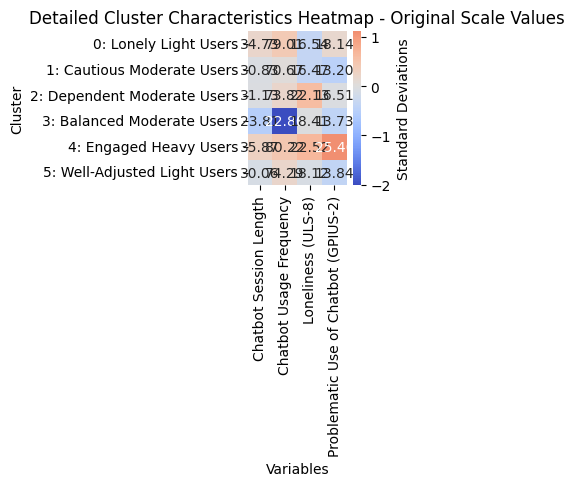

In [33]:
clustered_data_viz_og = clustered_data_viz.rename(columns=rename_dict_2)
clustered_data_viz_og['Cluster'] = clustered_data_viz_og['Cluster'].replace(cluster_dict)
key_variables_viz =  ['Chatbot Session Length', 'Chatbot Usage Frequency', 'Loneliness (ULS-8)', 'Problematic Use of Chatbot (GPIUS-2)']
selected_features_viz = []



cluster_means_viz = create_detailed_heatmap_std(clustered_data_viz_og, selected_features_viz, key_variables_viz)

In [34]:
clustered_data_viz_og.loc[clustered_data_viz_og['Cluster'] == '4: Engaged Heavy Users']['Chatbot_Frequency'].tolist()

['A few times a week',
 'Daily',
 'Around once a week',
 'Around once a week',
 'A few times a week',
 'Around once a week',
 'A few times a week',
 'Daily,A few times a week,Around once a week,A few times a month,Once a month or less,Varies from week to week,Varies from month to month',
 'Daily',
 'Daily',
 'Daily',
 'Daily,A few times a week,Around once a week',
 'A few times a week',
 'A few times a week',
 'Around once a week',
 'A few times a week,Varies from week to week',
 'Around once a week',
 'A few times a week',
 'Daily',
 'A few times a week',
 'A few times a week',
 'Daily',
 'Daily,A few times a week',
 'A few times a week',
 'A few times a week',
 'A few times a week',
 'Daily',
 'A few times a week,A few times a month,Varies from week to week,Varies from month to month',
 'A few times a week',
 'A few times a week',
 'Daily',
 'A few times a week',
 'Daily,A few times a week',
 'Around once a week',
 'A few times a week',
 'A few times a week,Around once a week',
 'Aro

In [35]:
clustered_data_viz

Unnamed:_0  index            StartDate              EndDate    Status_x  \
0             0      2  2024-06-10 16:25:22  2024-06-10 16:36:39  IP Address   
1             1      3  2024-06-10 16:22:15  2024-06-10 16:37:20  IP Address   
2             2      4  2024-06-10 16:26:47  2024-06-10 16:39:38  IP Address   
3             3      5  2024-06-10 16:22:16  2024-06-10 16:39:57  IP Address   
4             4      6  2024-06-10 16:25:01  2024-06-10 16:40:11  IP Address   
..          ...    ...                  ...                  ...         ...   
399         399    671  2024-08-05 17:07:39  2024-08-05 17:39:17  IP Address   
400         400    673  2024-08-06 08:47:03  2024-08-06 08:55:45  IP Address   
401         401    676  2024-08-06 21:41:46  2024-08-06 21:55:01  IP Address   
402         402    693  2024-08-08 17:30:42  2024-08-08 17:46:22  IP Address   
403         403    698  2024-08-09 05:43:55  2024-08-09 06:00:07  IP Address   

     Progress  Duration_(in_seconds)  Finished         RecordedDate  \
0         100                    677      True  2024-06-10 16:36:40   
1         100                    905      True  2024-06-10 16:37:21   
2         100                    770      True  2024-06-10 16:39:38   
3         100                   1060      True  2024-06-10 16:39:57   
4         100                    909      True  2024-06-10 16:40:11   
..        ...                    ...       ...                  ...   
399       100                   1898      True  2024-08-05 17:39:18   
400       100                    521      True  2024-08-06 08:55:46   
401       100                    794      True  2024-08-06 21:55:02   
402       100                    939      True  2024-08-08 17:46:23   
403       100                    972      True  2024-08-09 06:00:08   

            ResponseId  ... HHI_CommIntent___Familiar_centered  \
0    R_3Tq3KIlfVrBymDk  ...                           1.090324   
1    R_77JLXrlZNFvFjZA  ...                          -1.232124   
2    R_1xOvnrl7kD6ysKd  ...                           1.090324   
3    R_6i2xfeJezDf9zMB  ...                          -2.393348   
4    R_2oYYZFDVjHmNVrC  ...                          -0.070900   
..                 ...  ...                                ...   
399  R_5EA6LxEv0KYmvLe  ...                           0.703250   
400  R_1Dp5aKQHCAxZrmG  ...                           0.703250   
401  R_6IFqIBMPCNE0ZtT  ...                          -2.006274   
402  R_40JjHfQYavKjN2N  ...                           1.090324   
403  R_1UHBs8uY4WYlH0d  ...                           1.090324   

    H_State_Empathy_centered  H_SEmp_Affective_centered  \
0                   0.444724                  -0.387472   
1                  -3.172764                  -3.002680   
2                   0.712686                   0.733331   
3                  -1.163048                  -1.508276   
4                   0.310743                  -0.013871   
..                       ...                        ...   
399                 0.578705                   0.359730   
400                 0.846667                   0.359730   
401                -1.564991                  -1.881877   
402                 1.114629                   1.106932   
403                 0.444724                  -0.013871   

    H_SEmp_Cognitive_centered H_SEmp_Associative_centered  \
0                    0.575424                    1.021357   
1                   -2.625557                   -3.178423   
2                    0.575424                    0.671376   
3                   -1.025067                   -0.728551   
4                    0.575424                    0.321394   
..                        ...                         ...   
399                  0.575424                    0.671376   
400                  0.975546                    1.021357   
401                 -1.025067                   -1.428514   
402                  0.975546                    1.021357   
403               

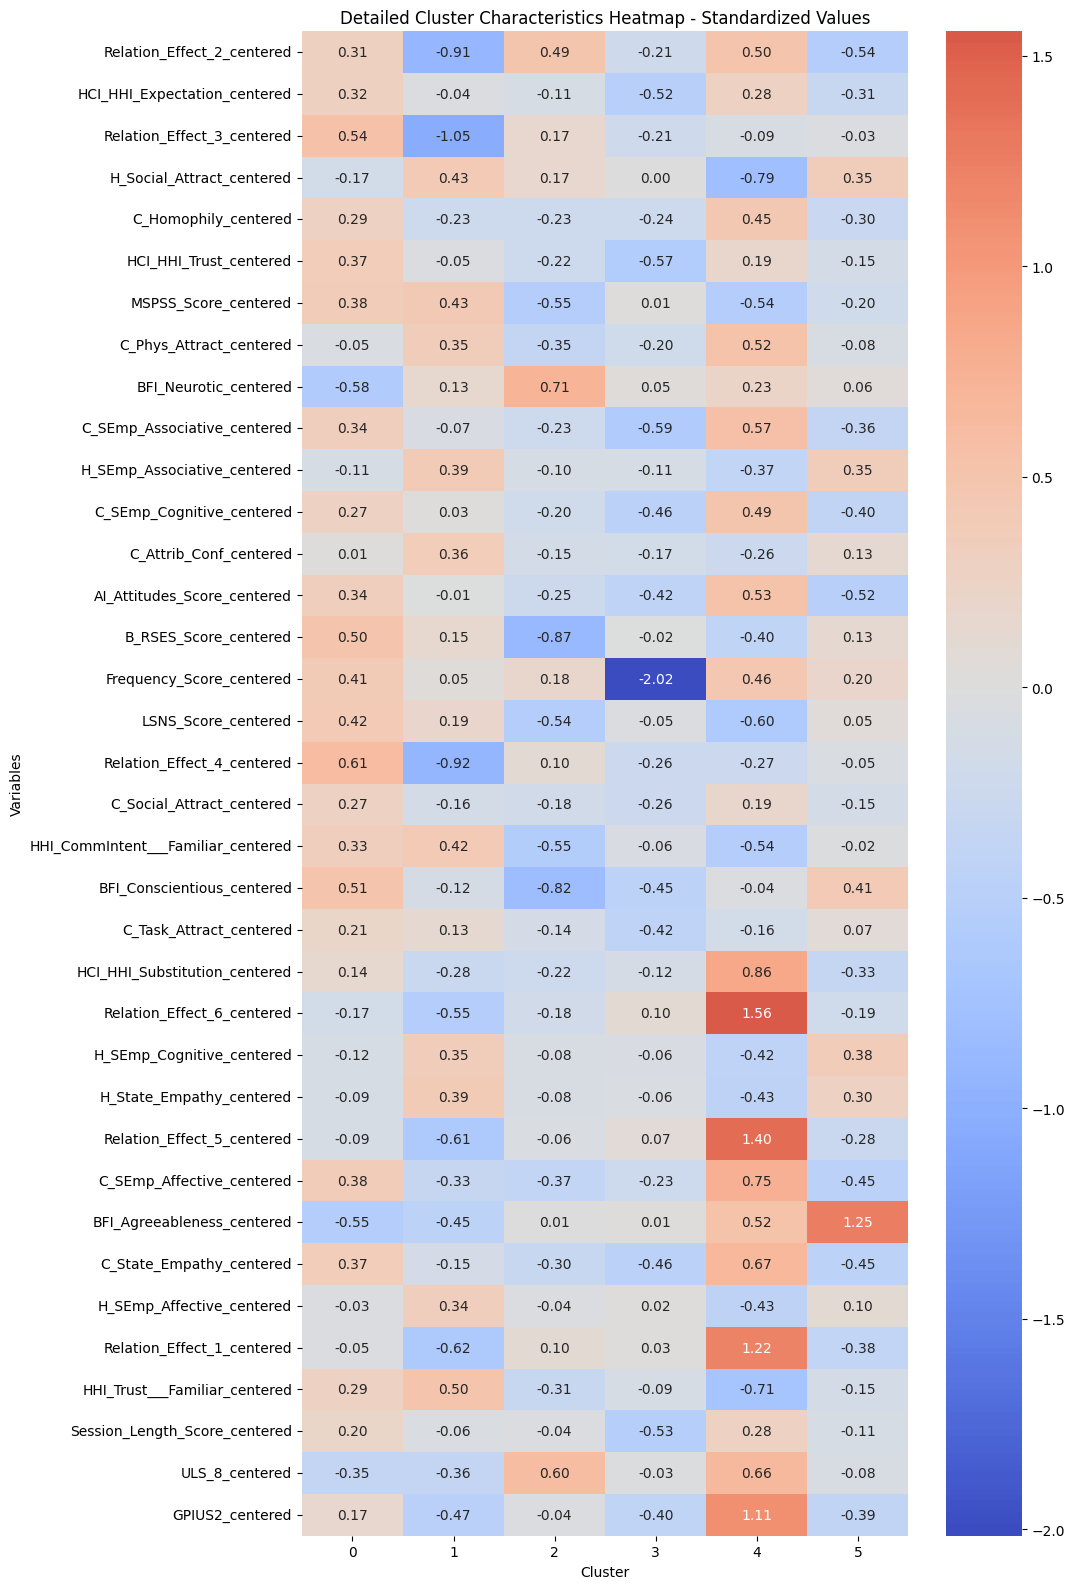

In [36]:
cluster_means = create_detailed_heatmap(clustered_data, selected_features, key_variables, transpose=True)

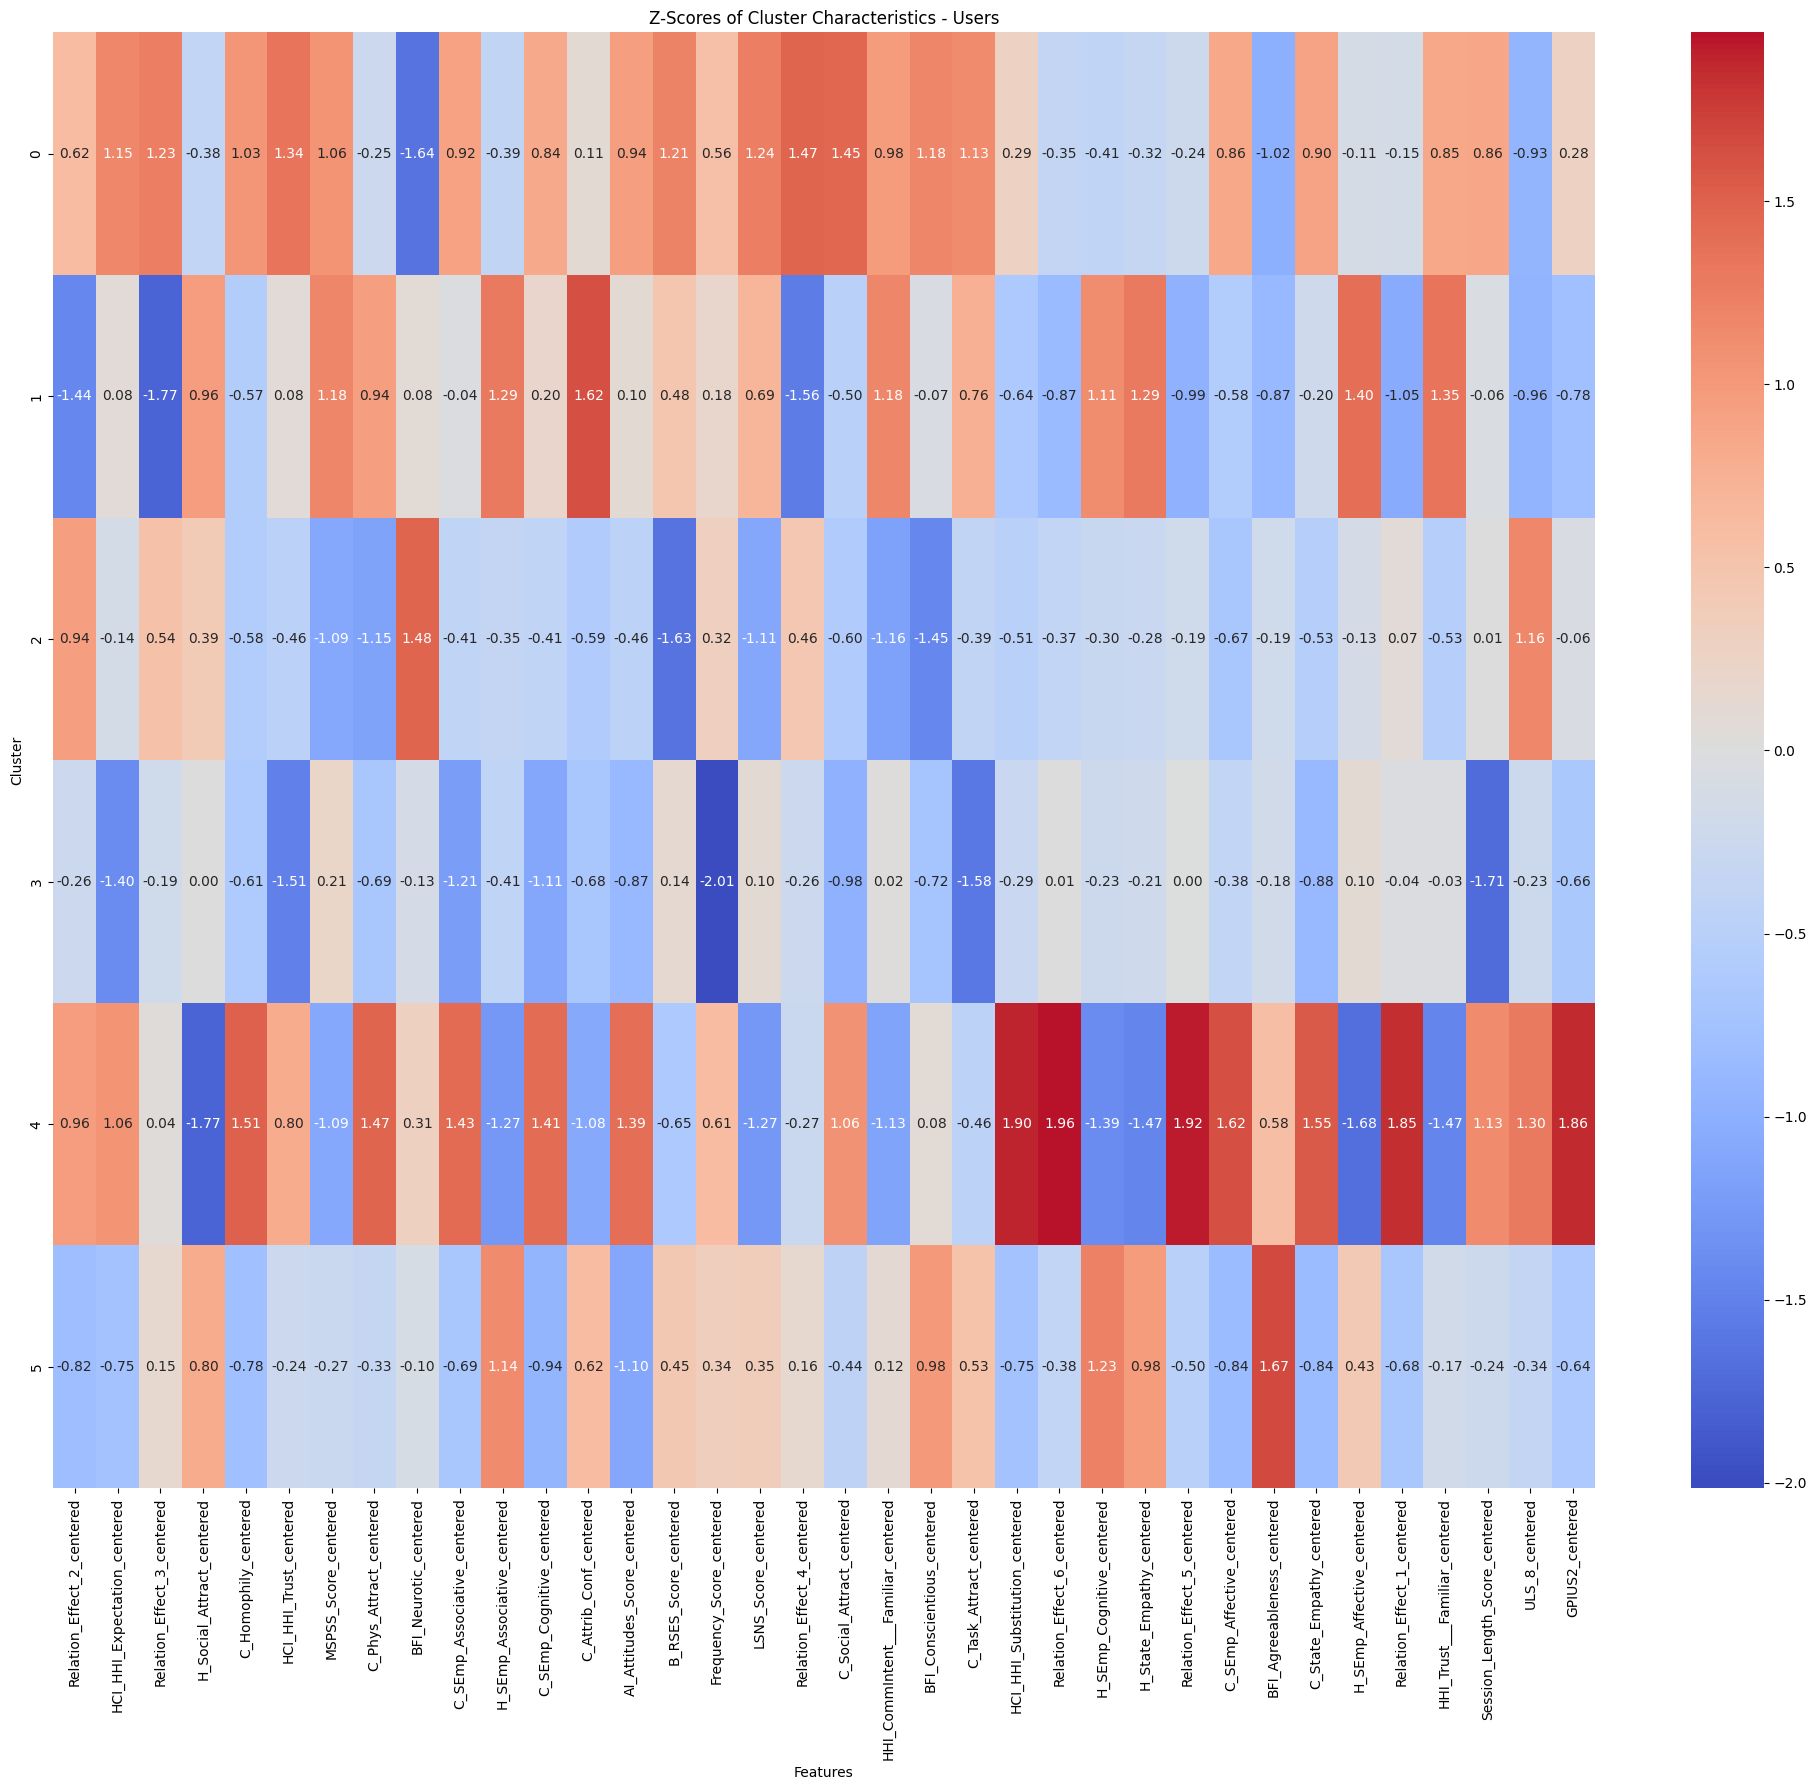

In [37]:
# Calculate z-scores for easier comparison
z_scores = calculate_z_scores(cluster_means)

# Create heatmap of z-scores
plt.figure(figsize=(20, len(z_scores.columns) * 0.5))
sns.heatmap(z_scores, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Z-Scores of Cluster Characteristics - Users')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [38]:
z_scores_viz = calculate_z_scores(cluster_means_viz)

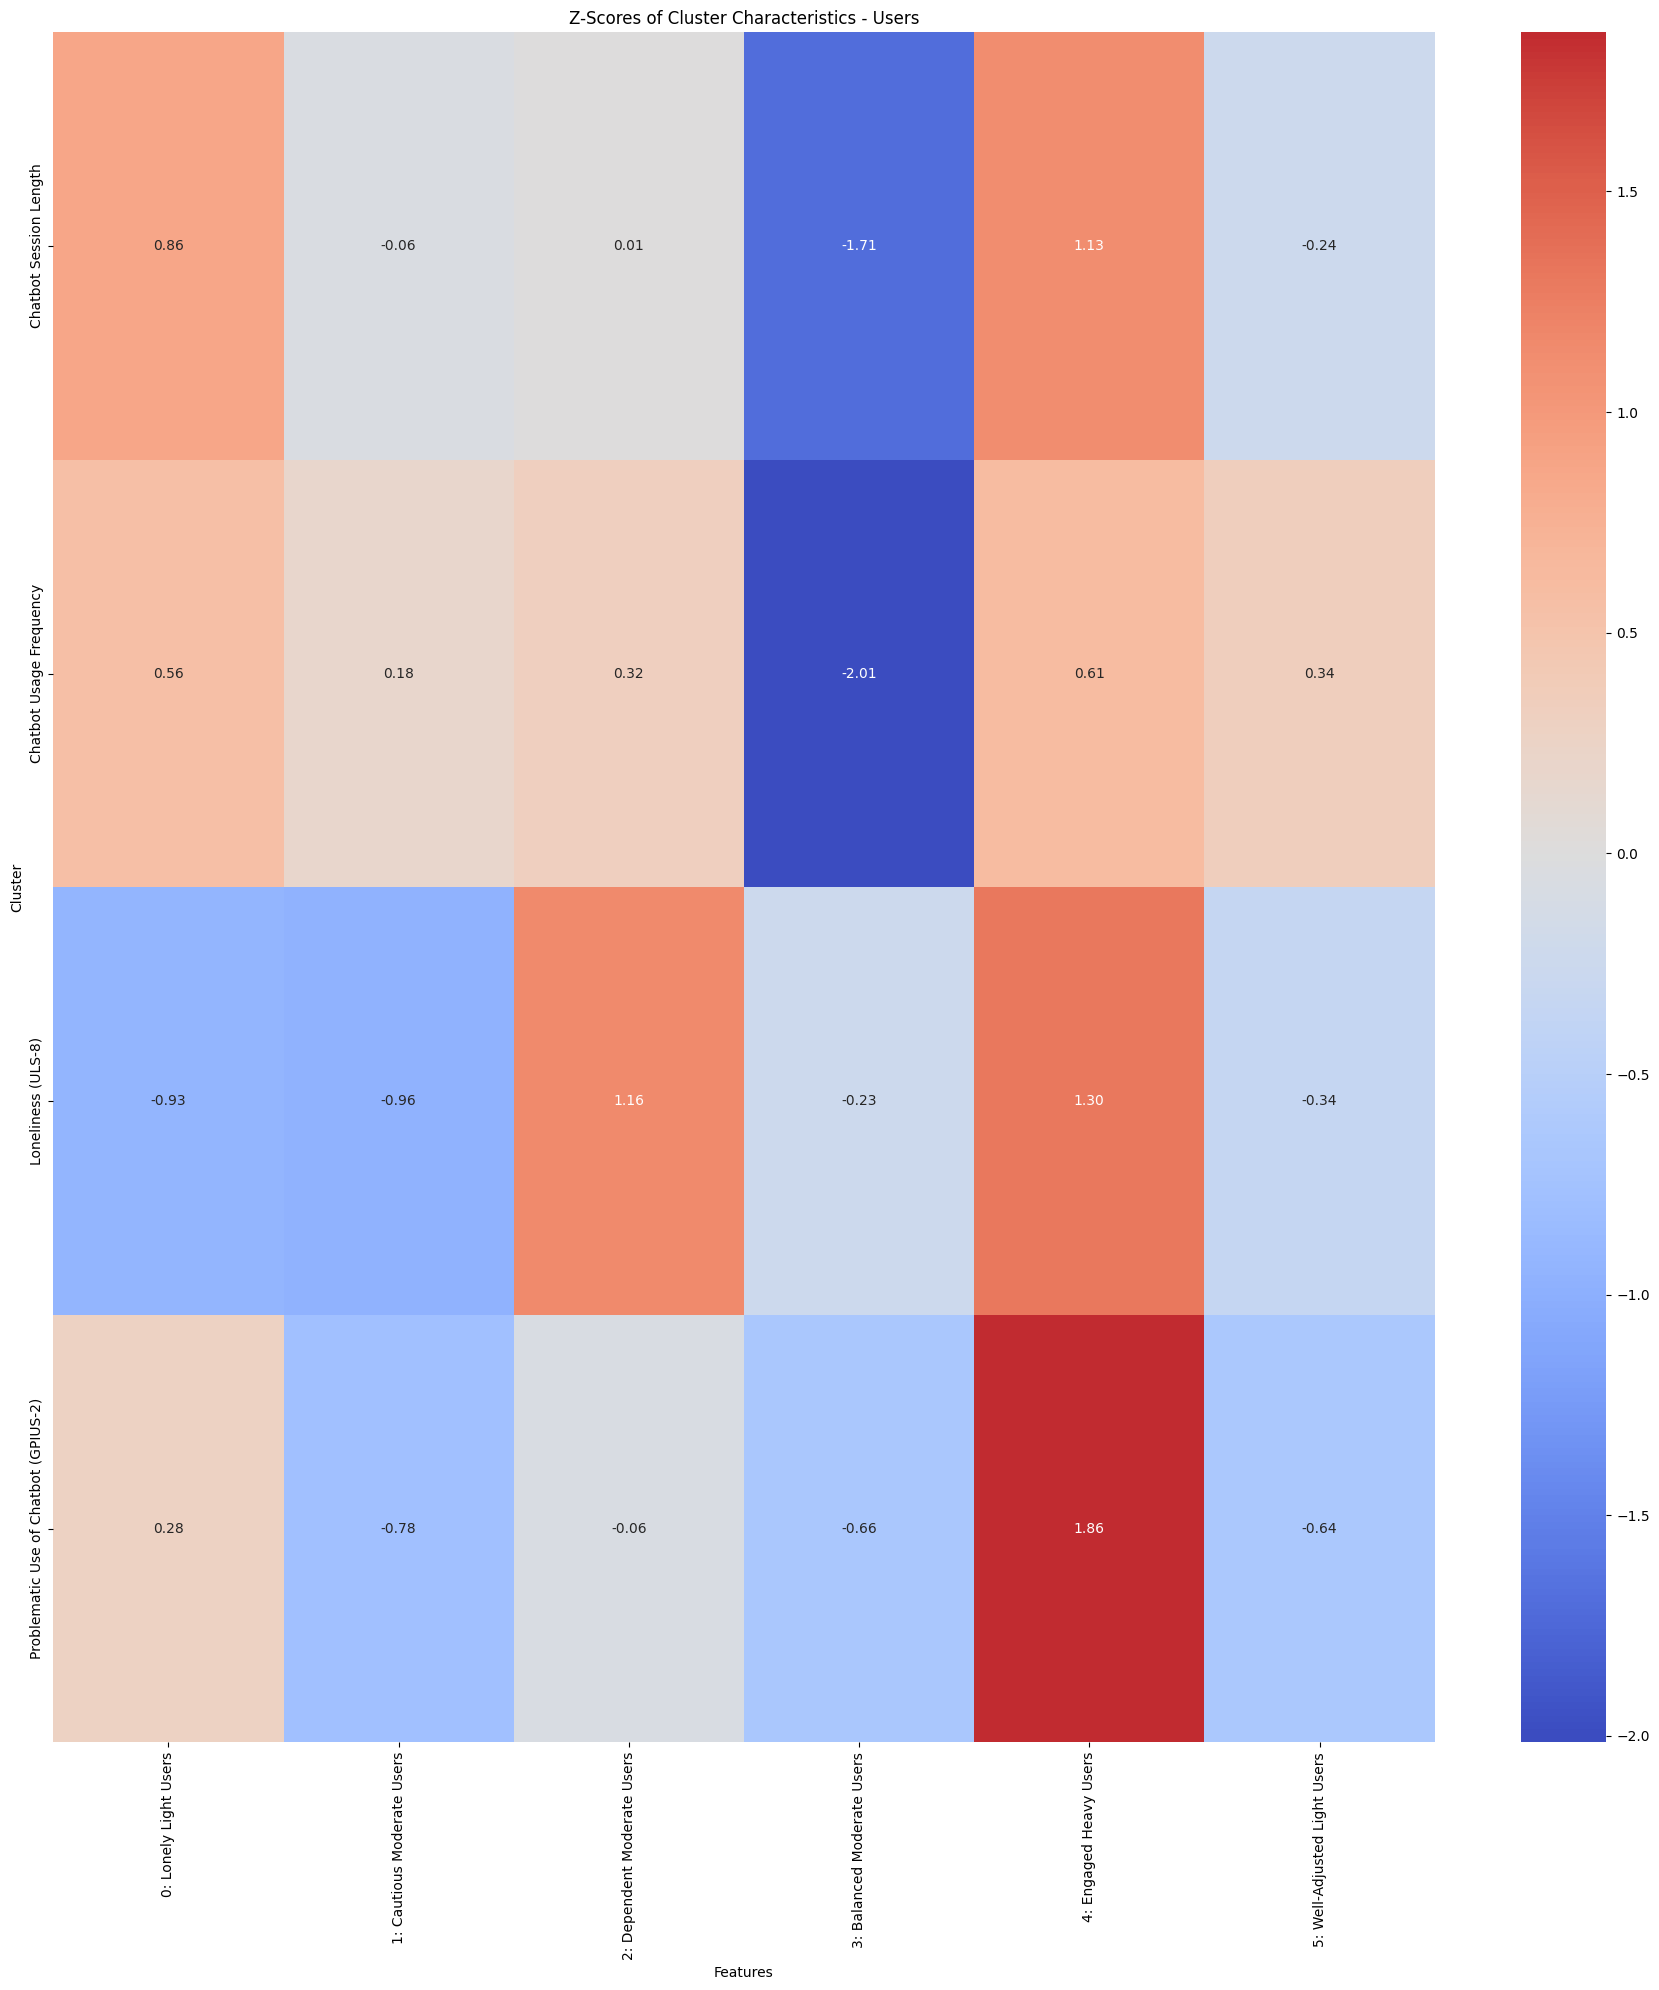

In [39]:
# Create heatmap of z-scores
plt.figure(figsize=(len(z_scores.columns) * 0.5,20))
sns.heatmap(z_scores_viz.transpose(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Z-Scores of Cluster Characteristics - Users')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

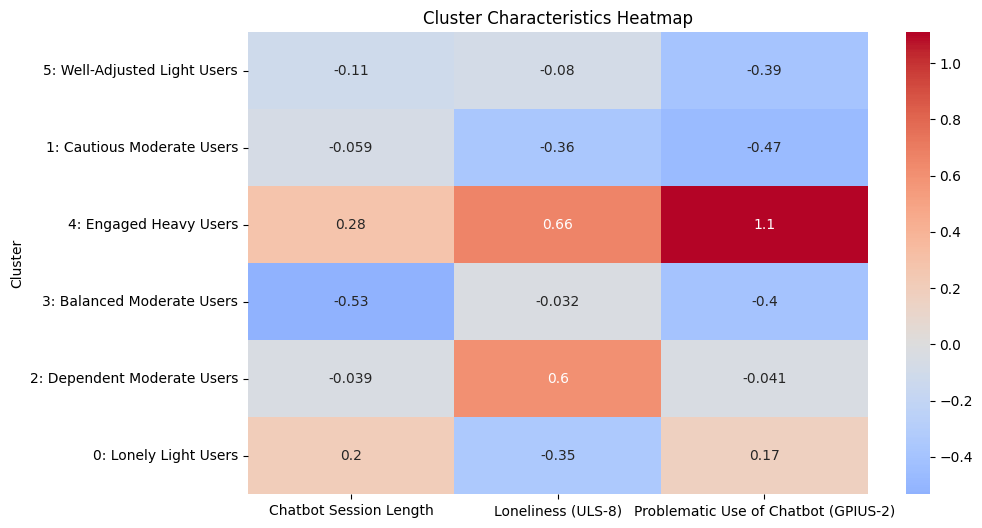

Selected features for clustering: ['Relation_Effect_2_centered', 'HCI_HHI_Expectation_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'C_Homophily_centered', 'HCI_HHI_Trust_centered', 'MSPSS_Score_centered', 'C_Phys_Attract_centered', 'BFI_Neurotic_centered', 'C_SEmp_Associative_centered', 'H_SEmp_Associative_centered', 'C_SEmp_Cognitive_centered', 'C_Attrib_Conf_centered', 'AI_Attitudes_Score_centered', 'B_RSES_Score_centered', 'Frequency_Score_centered', 'LSNS_Score_centered', 'Relation_Effect_4_centered', 'C_Social_Attract_centered', 'HHI_CommIntent___Familiar_centered', 'BFI_Conscientious_centered', 'C_Task_Attract_centered', 'HCI_HHI_Substitution_centered', 'Relation_Effect_6_centered', 'H_SEmp_Cognitive_centered', 'H_State_Empathy_centered', 'Relation_Effect_5_centered', 'C_SEmp_Affective_centered', 'BFI_Agreeableness_centered', 'C_State_Empathy_centered', 'H_SEmp_Affective_centered', 'Relation_Effect_1_centered', 'HHI_Trust___Familiar_centered']


In [40]:
# Define the desired order of clusters
cluster_order = [
    '5: Well-Adjusted Light Users',
    '1: Cautious Moderate Users',
    '4: Engaged Heavy Users',
    '3: Balanced Moderate Users',
    '2: Dependent Moderate Users',
    '0: Lonely Light Users'
]

# Reorder the cluster_characteristics_viz DataFrame
cluster_characteristics_viz = cluster_characteristics_viz.reindex(cluster_order)

# Visualize cluster characteristics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_characteristics_viz, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Characteristics Heatmap')

plt.savefig("/work/Output Figures/ClusterHeatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

print("Selected features for clustering:", selected_features)

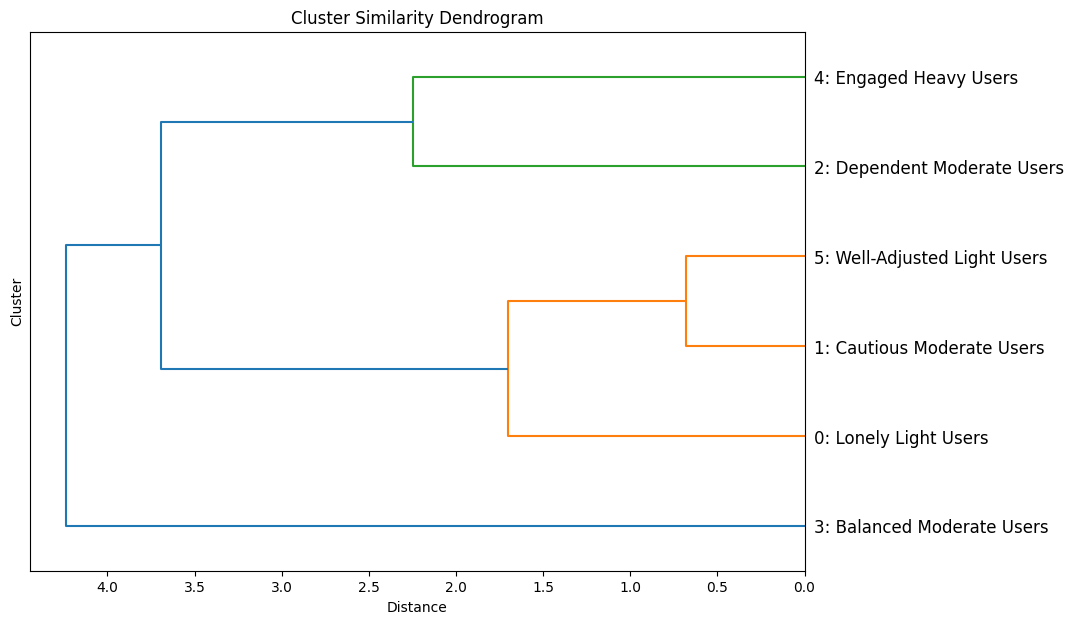

Similar clusters (cluster1, cluster2, distance):


array([[1.        , 5.        , 0.68085503, 2.        ],
       [0.        , 6.        , 1.70326017, 3.        ],
       [2.        , 4.        , 2.24882376, 2.        ],
       [7.        , 8.        , 3.69350144, 5.        ],
       [3.        , 9.        , 4.23511275, 6.        ]])

In [41]:
# Identify similar clusters
def identify_similar_clusters(z_scores, threshold=1.0):
    cluster_labels = z_scores.index.tolist()
    # Calculate pairwise distances between clusters
    distances = pdist(z_scores)
    linkage_matrix = linkage(distances, method='ward')
    
    # Create dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, orientation='left', labels=cluster_labels)  # Changed orientation to 'left'
    plt.title('Cluster Similarity Dendrogram')
    plt.ylabel('Cluster')  # Swapped xlabel and ylabel
    plt.xlabel('Distance')
    plt.show()

    return linkage_matrix
    

linkage_matrix = similar_clusters = identify_similar_clusters(z_scores_viz, threshold=1.5)

print("Similar clusters (cluster1, cluster2, distance):")
linkage_matrix

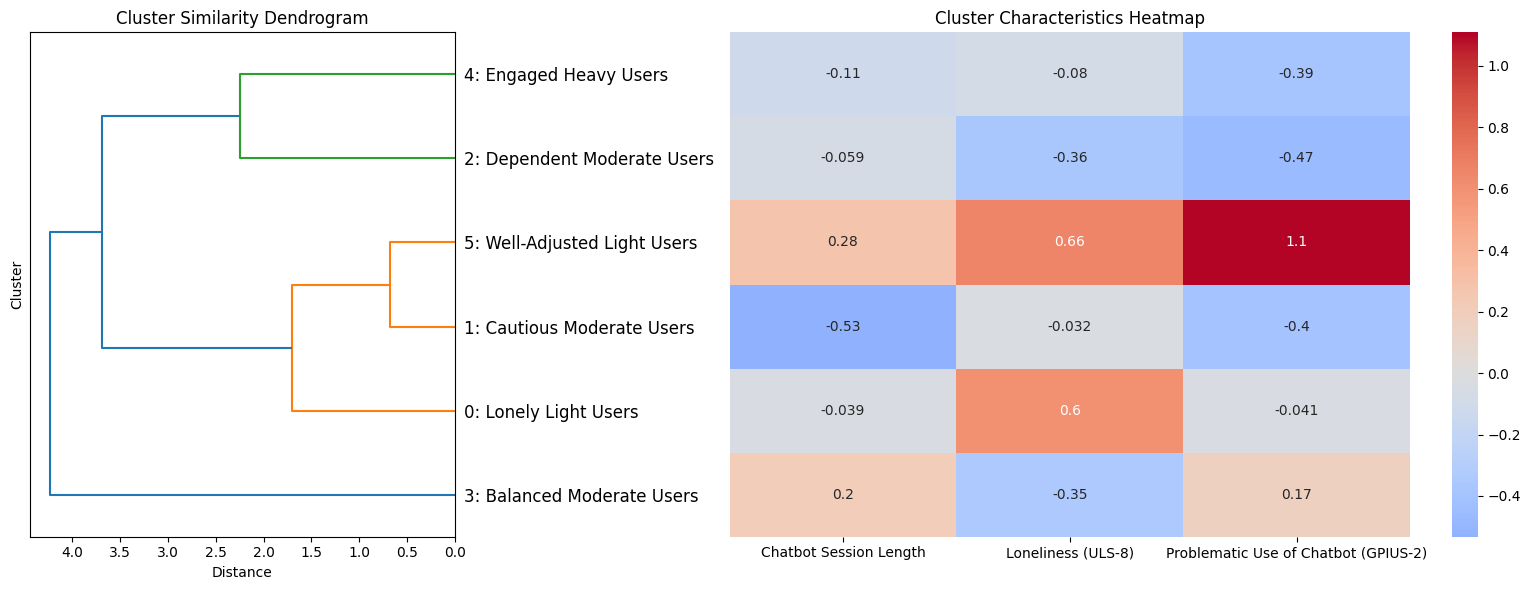

Selected features for clustering: ['Relation_Effect_2_centered', 'HCI_HHI_Expectation_centered', 'Relation_Effect_3_centered', 'H_Social_Attract_centered', 'C_Homophily_centered', 'HCI_HHI_Trust_centered', 'MSPSS_Score_centered', 'C_Phys_Attract_centered', 'BFI_Neurotic_centered', 'C_SEmp_Associative_centered', 'H_SEmp_Associative_centered', 'C_SEmp_Cognitive_centered', 'C_Attrib_Conf_centered', 'AI_Attitudes_Score_centered', 'B_RSES_Score_centered', 'Frequency_Score_centered', 'LSNS_Score_centered', 'Relation_Effect_4_centered', 'C_Social_Attract_centered', 'HHI_CommIntent___Familiar_centered', 'BFI_Conscientious_centered', 'C_Task_Attract_centered', 'HCI_HHI_Substitution_centered', 'Relation_Effect_6_centered', 'H_SEmp_Cognitive_centered', 'H_State_Empathy_centered', 'Relation_Effect_5_centered', 'C_SEmp_Affective_centered', 'BFI_Agreeableness_centered', 'C_State_Empathy_centered', 'H_SEmp_Affective_centered', 'Relation_Effect_1_centered', 'HHI_Trust___Familiar_centered']
Similar clu

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the desired order of clusters
cluster_order = [
    '5: Well-Adjusted Light Users',
    '1: Cautious Moderate Users',
    '4: Engaged Heavy Users',
    '3: Balanced Moderate Users',
    '2: Dependent Moderate Users',
    '0: Lonely Light Users'
]

# Reorder the cluster_characteristics_viz DataFrame
cluster_characteristics_viz = cluster_characteristics_viz.reindex(cluster_order)

# Create subplots with 2 columns for side-by-side plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 2]})

# Define the function for identifying similar clusters
def identify_similar_clusters(z_scores, threshold=1.0):
    cluster_labels = z_scores.index.tolist()
    # Calculate pairwise distances between clusters
    distances = pdist(z_scores)
    linkage_matrix = linkage(distances, method='ward')

    # Create dendrogram on ax1
    dendrogram(linkage_matrix, orientation='left', labels=cluster_labels, ax=ax1)
    ax1.set_title('Cluster Similarity Dendrogram')
    ax1.set_xlabel('Distance')
    ax1.set_ylabel('Cluster')
    
    return linkage_matrix

# Plot the dendrogram on the left (ax1)
linkage_matrix = identify_similar_clusters(z_scores_viz, threshold=1.5)

# Plot the heatmap on the right (ax2)
sns.heatmap(cluster_characteristics_viz, annot=True, cmap='coolwarm', center=0, ax=ax2, yticklabels=False)
ax2.set_title('Cluster Characteristics Heatmap')
ax2.set_ylabel('')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("/work/Output Figures/ClusterHeatmap_Dendrogram.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

print("Selected features for clustering:", selected_features)
print("Similar clusters (cluster1, cluster2, distance):")
print(linkage_matrix)

In [43]:
clustered_data_ch = clustered_data.copy().rename(columns=rename_dict)

In [44]:
# Characterize clusters
def characterize_clusters(clustered_data,cluster_means, z_scores, key_variables):
    cluster_sizes = clustered_data['Cluster'].value_counts().sort_index()
    if ~isinstance(cluster_means.index[0], int): 
        cluster_num = range(len(cluster_means.index))
    else:
        cluster_num = cluster_means.index
    for cluster in cluster_means.index:
        cluster_size = cluster_sizes[cluster]
        total_samples = len(clustered_data)
        cluster_percentage = (cluster_size / total_samples) * 100
        
        print(f"\nCluster {cluster} profile:")
        print(f"Size: {cluster_size} samples ({cluster_percentage:.2f}% of total)")
        
        # Always include key variables
        for feature in key_variables:
            value = cluster_means.loc[cluster, feature]
            z_score = z_scores.loc[cluster, feature]
            level = "high" if z_score > 1 else "low" if z_score < -1 else "average"
            print(f"- {feature}: {level.capitalize()} ({value:.2f}, z-score: {z_score:.2f})")
        
        # Include other features with notable z-scores
        for feature in cluster_means.columns:
            if feature not in key_variables:
                value = cluster_means.loc[cluster, feature]
                z_score = z_scores.loc[cluster, feature]
                if abs(z_score) > 1:
                    level = "high" if z_score > 0 else "low"
                    print(f"- {feature}: {level.capitalize()} ({value:.2f}, z-score: {z_score:.2f})")

characterize_clusters(clustered_data_ch, cluster_means_viz, z_scores_viz, key_variables_viz)

KeyError: '0: Lonely Light Users'

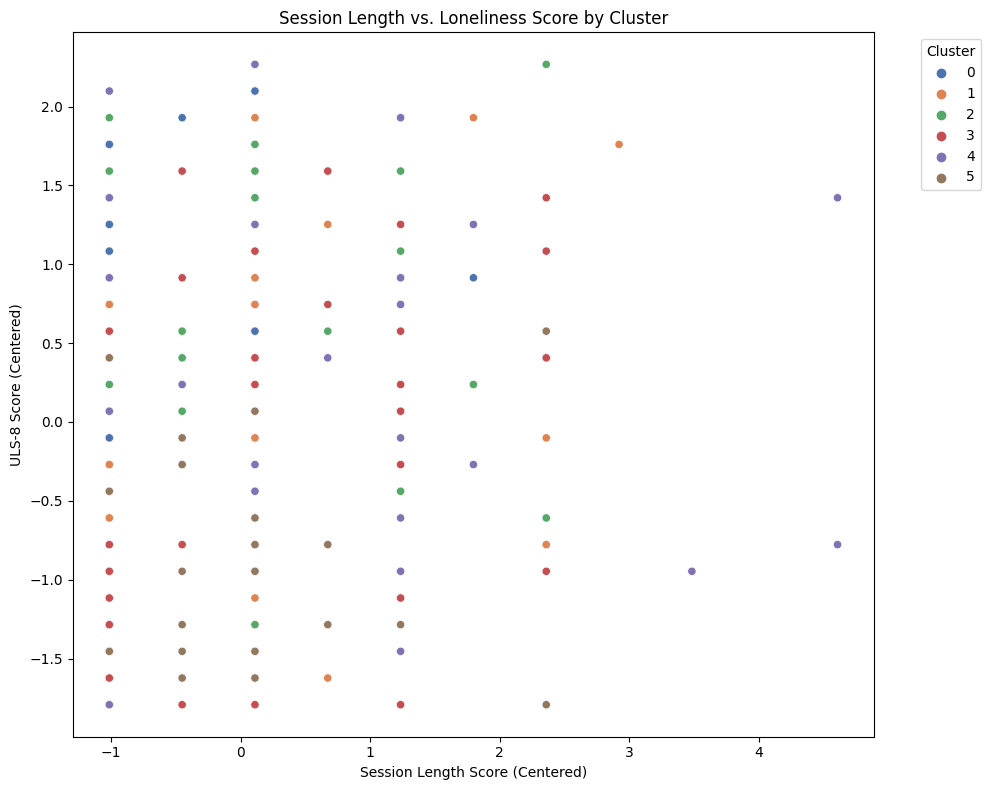

In [35]:
# Scatter plot of Session Length vs. ULS-8 scores, colored by cluster
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=clustered_data, x='Session_Length_Score_centered', y='ULS_8_centered', hue='Cluster', palette='deep')
plt.title('Session Length vs. Loneliness Score by Cluster')
plt.xlabel('Session Length Score (Centered)')
plt.ylabel('ULS-8 Score (Centered)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

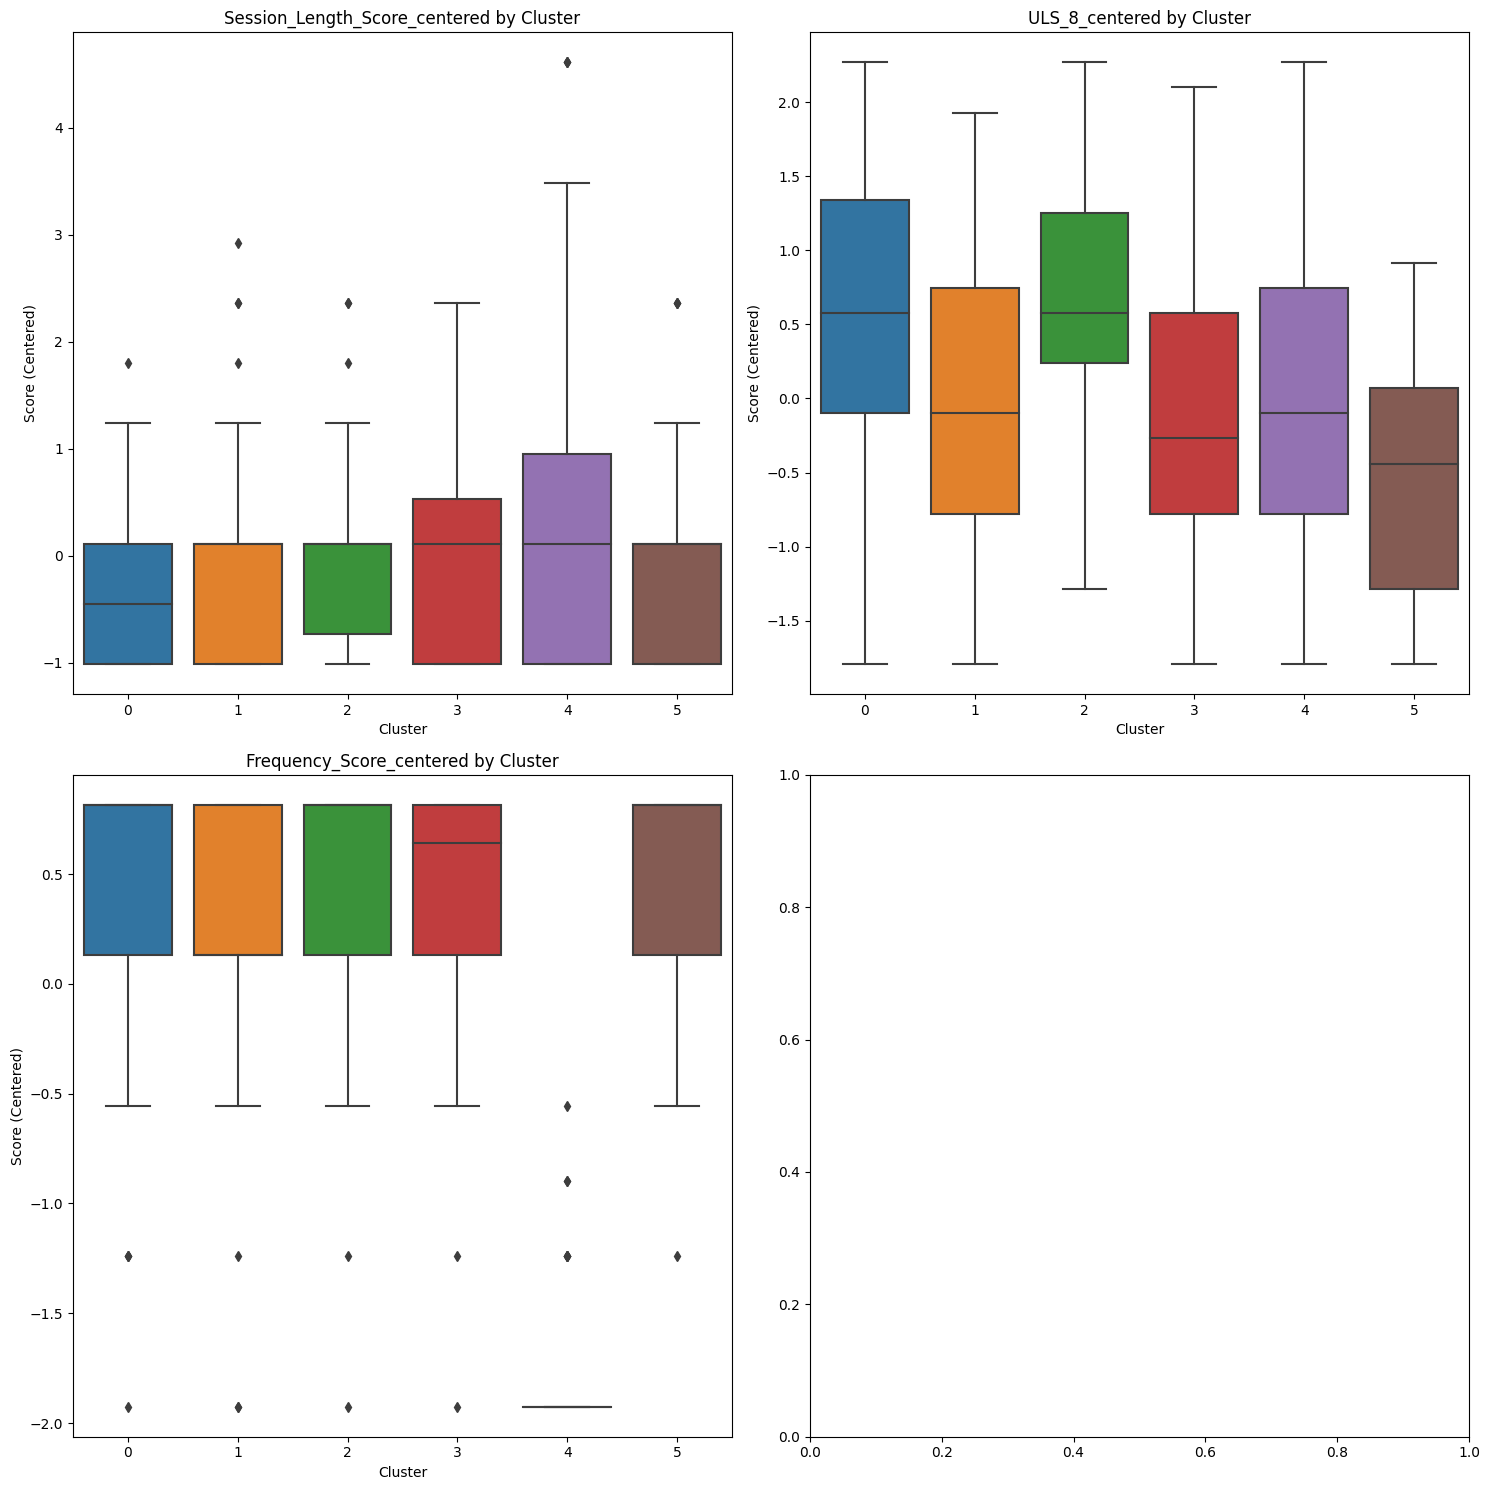

In [36]:
# Box plots for key variables across clusters
key_variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'Frequency_Score_centered']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate(key_variables):
    sns.boxplot(data=clustered_data, x='Cluster', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Score (Centered)')

plt.tight_layout()
plt.show()

# Statistical Tests

In [37]:
def check_normality(data):
    _, p_value = shapiro(data)
    return p_value > 0.05  # Return True if data is likely normal (p > 0.05)

def perform_anova_or_kruskal(df, variable):
    groups = [group[variable].values for name, group in df.groupby('Cluster')]
    
    # Check normality for each group
    normality = all(check_normality(group) for group in groups)
    
    if normality:
        # Perform one-way ANOVA
        f_statistic, p_value = stats.f_oneway(*groups)
        test_name = "ANOVA"
        
        # Post-hoc Tukey's test
        tukey_results = pairwise_tukeyhsd(df[variable], df['Cluster'])
        
    else:
        # Perform Kruskal-Wallis H-test
        h_statistic, p_value = stats.kruskal(*groups)
        test_name = "Kruskal-Wallis"
        tukey_results = None  # Tukey's test is not applicable for non-parametric tests
    
    return test_name, p_value, tukey_results

In [38]:
variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'GPIUS2_centered']

for var in variables:
    test_name, p_value, tukey_results = perform_anova_or_kruskal(clustered_data, var)
    print(f"{test_name} results for {var}:")
    print(f"p-value: {p_value}")
    
    if tukey_results is not None:
        print("Post-hoc Tukey's test results:")
        print(tukey_results)
    print("\n")

# Silhouette Analysis
X = clustered_data[variables]
silhouette_avg = silhouette_score(X, clustered_data['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

Kruskal-Wallis results for Session_Length_Score_centered:
p-value: 0.1257484417113972


Kruskal-Wallis results for ULS_8_centered:
p-value: 1.1401267826842006e-14


Kruskal-Wallis results for GPIUS2_centered:
p-value: 1.0298845265373253e-07


The average silhouette score is: -0.08431357599147708


In [39]:
manova = MANOVA.from_formula('Session_Length_Score_centered + ULS_8_centered + GPIUS2_centered ~ C(Cluster)', data=clustered_data)
print("MANOVA results:")
print(manova.mv_test())

MANOVA results:
                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9349 3.0000 396.0000  9.1961 0.0000
           Pillai's trace 0.0651 3.0000 396.0000  9.1961 0.0000
   Hotelling-Lawley trace 0.0697 3.0000 396.0000  9.1961 0.0000
      Roy's greatest root 0.0697 3.0000 396.0000  9.1961 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       C(Cluster)       Value   Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.7374 15.0000 1093.5830  8.5061 0.0000
         Pillai's trace 0.2767 15.0000 1194

In [40]:
def box_m_test(df, variables, group_variable):
    groups = df[group_variable].unique()
    k = len(groups)
    v = len(variables)
    n = len(df)
    n_i = df[group_variable].value_counts().sort_index().values
    
    S_pooled = np.zeros((v, v))
    for group in groups:
        S_i = np.cov(df[df[group_variable] == group][variables].T)
        S_pooled += (n_i[groups == group][0] - 1) * S_i
    S_pooled /= (n - k)
    
    M = (n - k) * np.log(np.linalg.det(S_pooled))
    for group in groups:
        S_i = np.cov(df[df[group_variable] == group][variables].T)
        M -= (n_i[groups == group][0] - 1) * np.log(np.linalg.det(S_i))
    
    c = (sum(1 / (n_i[i] - 1) for i in range(k)) - 1 / (n - k)) * \
        (2 * v**2 + 3 * v - 1) / (6 * (v + 1) * (k - 1))
    chi2 = M * (1 - c)
    df = int((v * (v + 1) * (k - 1)) / 2)  # Ensure df is an integer
    p_value = 1 - stats.chi2.cdf(chi2, df)
    
    return chi2, p_value

# Ensure 'Cluster' column is categorical
clustered_data['Cluster'] = clustered_data['Cluster'].astype('category')

# List of variables to analyze
variables = ['Session_Length_Score_centered', 'ULS_8_centered', 'GPIUS2_centered']

# Perform Box's M-test
chi2, p_value = box_m_test(clustered_data, variables, 'Cluster')
print("\nBox's M-test for homogeneity of covariance matrices:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")


Box's M-test for homogeneity of covariance matrices:
Chi-square statistic: 69.81985339125413
p-value: 5.132005169816711e-05


In [41]:
df

Unnamed:_0  index            StartDate              EndDate    Status_x  \
0             0      2  2024-06-10 16:25:22  2024-06-10 16:36:39  IP Address   
1             1      3  2024-06-10 16:22:15  2024-06-10 16:37:20  IP Address   
2             2      4  2024-06-10 16:26:47  2024-06-10 16:39:38  IP Address   
3             3      5  2024-06-10 16:22:16  2024-06-10 16:39:57  IP Address   
4             4      6  2024-06-10 16:25:01  2024-06-10 16:40:11  IP Address   
..          ...    ...                  ...                  ...         ...   
399         399    671  2024-08-05 17:07:39  2024-08-05 17:39:17  IP Address   
400         400    673  2024-08-06 08:47:03  2024-08-06 08:55:45  IP Address   
401         401    676  2024-08-06 21:41:46  2024-08-06 21:55:01  IP Address   
402         402    693  2024-08-08 17:30:42  2024-08-08 17:46:22  IP Address   
403         403    698  2024-08-09 05:43:55  2024-08-09 06:00:07  IP Address   

     Progress  Duration_(in_seconds)  Finished         RecordedDate  \
0         100                    677      True  2024-06-10 16:36:40   
1         100                    905      True  2024-06-10 16:37:21   
2         100                    770      True  2024-06-10 16:39:38   
3         100                   1060      True  2024-06-10 16:39:57   
4         100                    909      True  2024-06-10 16:40:11   
..        ...                    ...       ...                  ...   
399       100                   1898      True  2024-08-05 17:39:18   
400       100                    521      True  2024-08-06 08:55:46   
401       100                    794      True  2024-08-06 21:55:02   
402       100                    939      True  2024-08-08 17:46:23   
403       100                    972      True  2024-08-09 06:00:08   

            ResponseId  ... HHI_Trust___Familiar_centered  \
0    R_3Tq3KIlfVrBymDk  ...                      1.102018   
1    R_77JLXrlZNFvFjZA  ...                     -1.315441   
2    R_1xOvnrl7kD6ysKd  ...                      0.699108   
3    R_6i2xfeJezDf9zMB  ...                     -2.927080   
4    R_2oYYZFDVjHmNVrC  ...                      0.296199   
..                 ...  ...                           ...   
399  R_5EA6LxEv0KYmvLe  ...                      0.296199   
400  R_1Dp5aKQHCAxZrmG  ...                      0.296199   
401  R_6IFqIBMPCNE0ZtT  ...                     -0.509621   
402  R_40JjHfQYavKjN2N  ...                      1.102018   
403  R_1UHBs8uY4WYlH0d  ...                      1.102018   

    HHI_CommIntent___Familiar_centered  H_State_Empathy_centered  \
0                             1.090324                  0.444724   
1                            -1.232124                 -3.172764   
2                             1.090324                  0.712686   
3                            -2.393348                 -1.163048   
4                            -0.070900                  0.310743   
..                                 ...                       ...   
399                           0.703250                  0.578705   
400                           0.703250                  0.846667   
401                          -2.006274                 -1.564991   
402                           1.090324                  1.114629   
403                           1.090324                  0.444724   

    H_SEmp_Affective_centered H_SEmp_Cognitive_centered  \
0                   -0.387472                  0.575424   
1                   -3.002680                 -2.625557   
2                    0.733331                  0.575424   
3                   -1.508276                 -1.025067   
4                   -0.013871                  0.575424   
..                        ...                       ...   
399                  0.359730                  0.575424   
400                  0.359730                  0.975546   
401                 -1.881877                 -1.025067   
402                  1.106932                  0.97

In [42]:
merged_df = pd.concat([df, clustered_data], axis=1)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df

Unnamed:_0  index            StartDate              EndDate    Status_x  \
0             0      2  2024-06-10 16:25:22  2024-06-10 16:36:39  IP Address   
1             1      3  2024-06-10 16:22:15  2024-06-10 16:37:20  IP Address   
2             2      4  2024-06-10 16:26:47  2024-06-10 16:39:38  IP Address   
3             3      5  2024-06-10 16:22:16  2024-06-10 16:39:57  IP Address   
4             4      6  2024-06-10 16:25:01  2024-06-10 16:40:11  IP Address   
..          ...    ...                  ...                  ...         ...   
399         399    671  2024-08-05 17:07:39  2024-08-05 17:39:17  IP Address   
400         400    673  2024-08-06 08:47:03  2024-08-06 08:55:45  IP Address   
401         401    676  2024-08-06 21:41:46  2024-08-06 21:55:01  IP Address   
402         402    693  2024-08-08 17:30:42  2024-08-08 17:46:22  IP Address   
403         403    698  2024-08-09 05:43:55  2024-08-09 06:00:07  IP Address   

     Progress  Duration_(in_seconds)  Finished         RecordedDate  \
0         100                    677      True  2024-06-10 16:36:40   
1         100                    905      True  2024-06-10 16:37:21   
2         100                    770      True  2024-06-10 16:39:38   
3         100                   1060      True  2024-06-10 16:39:57   
4         100                    909      True  2024-06-10 16:40:11   
..        ...                    ...       ...                  ...   
399       100                   1898      True  2024-08-05 17:39:18   
400       100                    521      True  2024-08-06 08:55:46   
401       100                    794      True  2024-08-06 21:55:02   
402       100                    939      True  2024-08-08 17:46:23   
403       100                    972      True  2024-08-09 06:00:08   

            ResponseId  ... HHI_CommIntent___Familiar_centered  \
0    R_3Tq3KIlfVrBymDk  ...                           1.090324   
1    R_77JLXrlZNFvFjZA  ...                          -1.232124   
2    R_1xOvnrl7kD6ysKd  ...                           1.090324   
3    R_6i2xfeJezDf9zMB  ...                          -2.393348   
4    R_2oYYZFDVjHmNVrC  ...                          -0.070900   
..                 ...  ...                                ...   
399  R_5EA6LxEv0KYmvLe  ...                           0.703250   
400  R_1Dp5aKQHCAxZrmG  ...                           0.703250   
401  R_6IFqIBMPCNE0ZtT  ...                          -2.006274   
402  R_40JjHfQYavKjN2N  ...                           1.090324   
403  R_1UHBs8uY4WYlH0d  ...                           1.090324   

    H_State_Empathy_centered  H_SEmp_Affective_centered  \
0                   0.444724                  -0.387472   
1                  -3.172764                  -3.002680   
2                   0.712686                   0.733331   
3                  -1.163048                  -1.508276   
4                   0.310743                  -0.013871   
..                       ...                        ...   
399                 0.578705                   0.359730   
400                 0.846667                   0.359730   
401                -1.564991                  -1.881877   
402                 1.114629                   1.106932   
403                 0.444724                  -0.013871   

    H_SEmp_Cognitive_centered H_SEmp_Associative_centered  \
0                    0.575424                    1.021357   
1                   -2.625557                   -3.178423   
2                    0.575424                    0.671376   
3                   -1.025067                   -0.728551   
4                    0.575424                    0.321394   
..                        ...                         ...   
399                  0.575424                    0.671376   
400                  0.975546                    1.021357   
401                 -1.025067                   -1.428514   
402                  0.975546                    1.021357   
403               

In [43]:
merged_df.to_csv('/work/Output Data/' + name + '_clustered.csv', index=False)